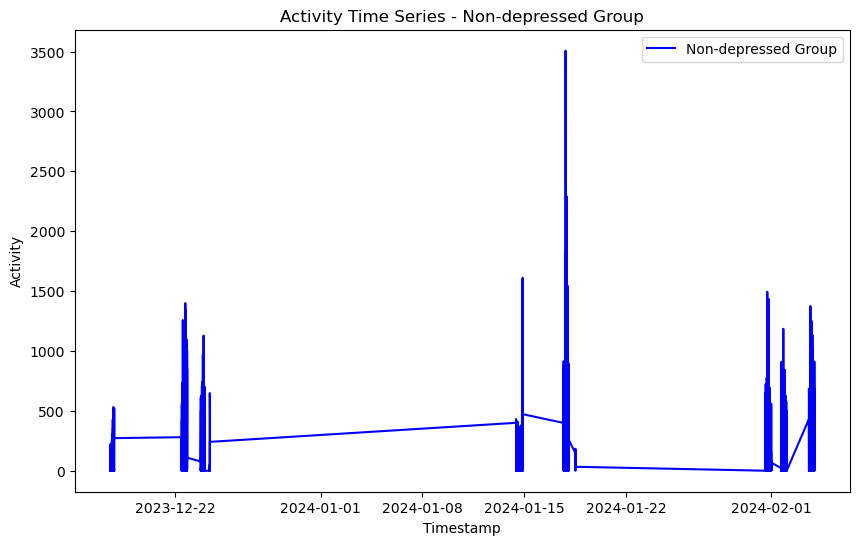

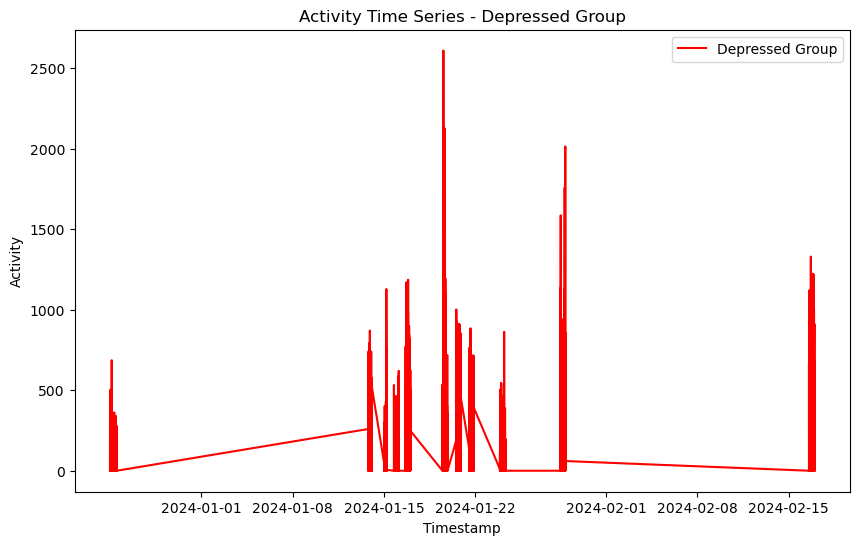

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load control20.csv and condition20.csv
control_df = pd.read_csv('ndep.csv')
condition_df = pd.read_csv('dep.csv')

# Convert 'timestamp' column to datetime format
control_df['timestamp'] = pd.to_datetime(control_df['timestamp'])
condition_df['timestamp'] = pd.to_datetime(condition_df['timestamp'])

# Plot time series for control group
plt.figure(figsize=(10, 6))
plt.plot(control_df['timestamp'], control_df['activity'], label='Non-depressed Group', color='blue')
plt.title('Activity Time Series - Non-depressed Group')
plt.xlabel('Timestamp')
plt.ylabel('Activity')
plt.legend()
plt.show()

# Plot time series for depressed group
plt.figure(figsize=(10, 6))
plt.plot(condition_df['timestamp'], condition_df['activity'], label='Depressed Group', color='red')
plt.title('Activity Time Series - Depressed Group')
plt.xlabel('Timestamp')
plt.ylabel('Activity')
plt.legend()
plt.show()


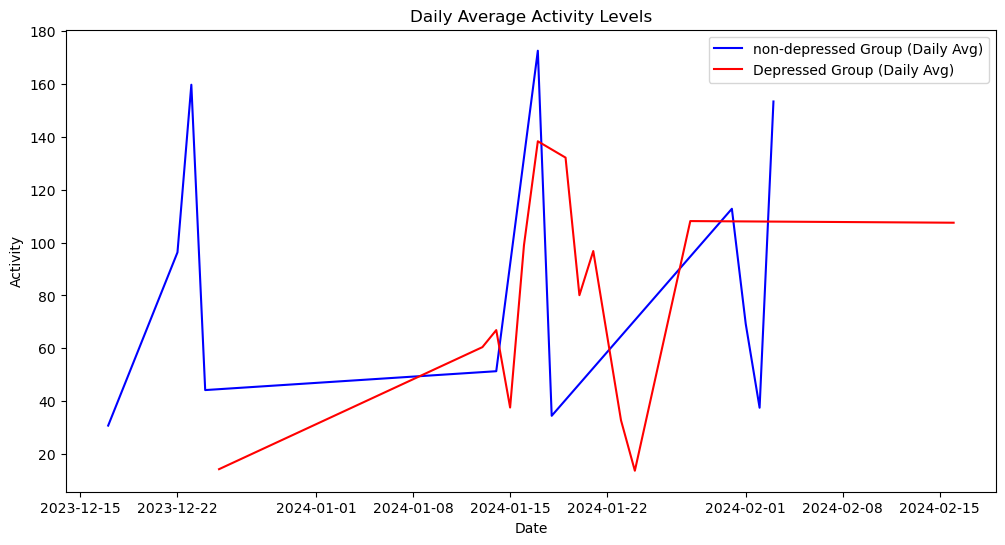

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load control20.csv and condition20.csv
control_df = pd.read_csv('ndep.csv')
condition_df = pd.read_csv('dep.csv')

# Convert 'timestamp' column to datetime format
control_df['timestamp'] = pd.to_datetime(control_df['timestamp'])
condition_df['timestamp'] = pd.to_datetime(condition_df['timestamp'])

# Calculate daily averages for both groups
control_df['date'] = control_df['timestamp'].dt.date
condition_df['date'] = condition_df['timestamp'].dt.date

control_daily_avg = control_df.groupby('date')['activity'].mean()
condition_daily_avg = condition_df.groupby('date')['activity'].mean()

# Convert index to datetime for daily averages
control_daily_avg.index = pd.to_datetime(control_daily_avg.index)
condition_daily_avg.index = pd.to_datetime(condition_daily_avg.index)

# Calculate weekly trends for both groups
control_weekly_avg = control_daily_avg.resample('W').mean()
condition_weekly_avg = condition_daily_avg.resample('W').mean()

# Plotting daily averages for both groups
plt.figure(figsize=(12, 6))

plt.plot(control_daily_avg.index, control_daily_avg.values, label='non-depressed Group (Daily Avg)', color='blue')
plt.plot(condition_daily_avg.index, condition_daily_avg.values, label='Depressed Group (Daily Avg)', color='red')

plt.title('Daily Average Activity Levels')
plt.xlabel('Date')
plt.ylabel('Activity')
plt.legend()
plt.show()



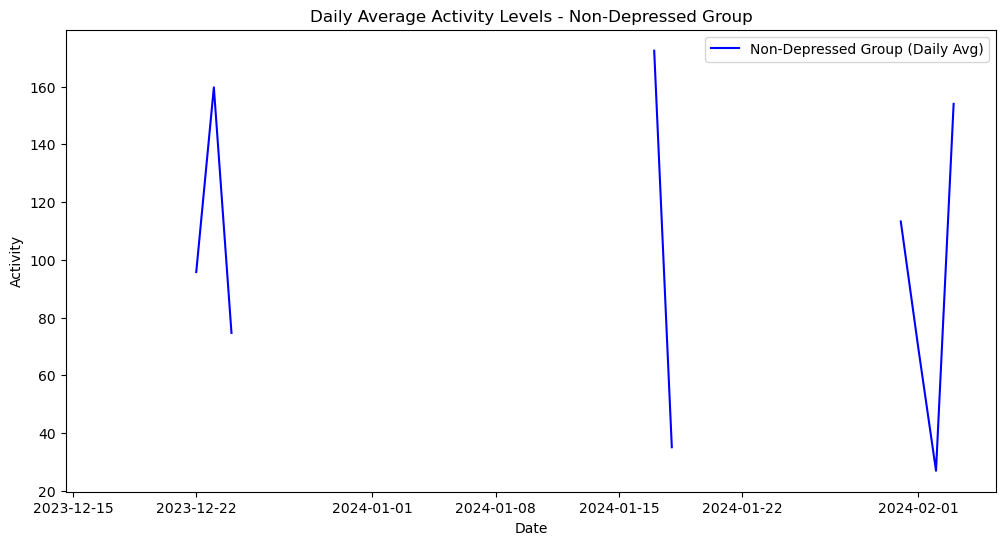

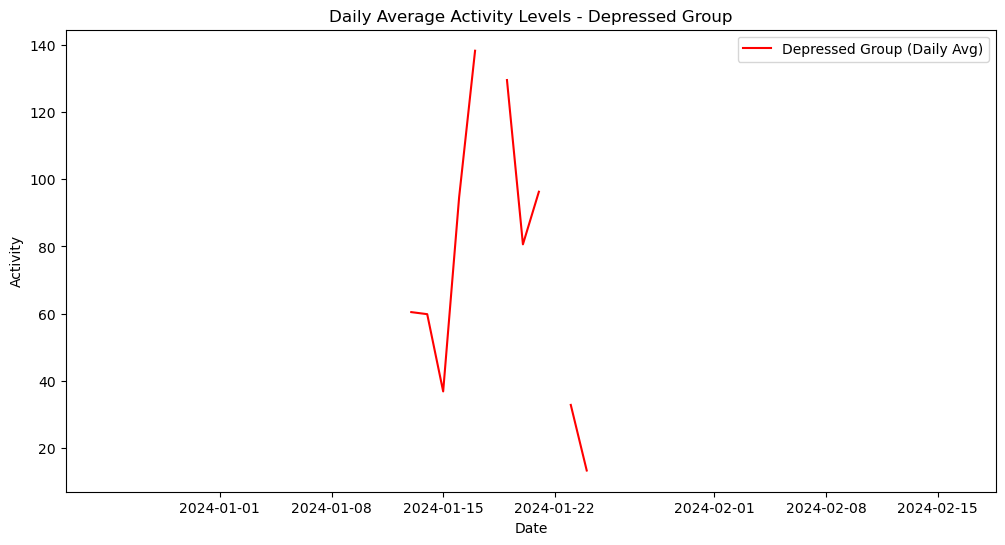

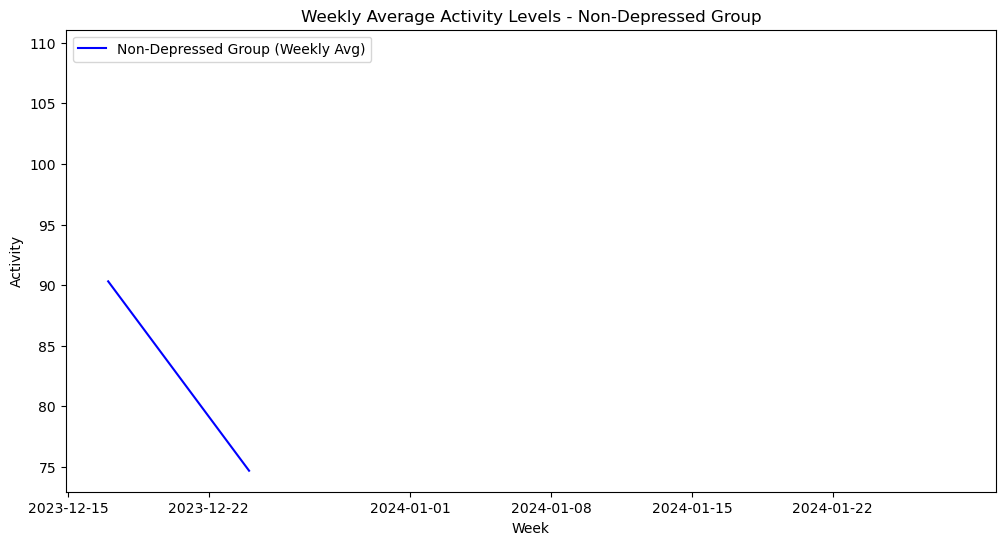

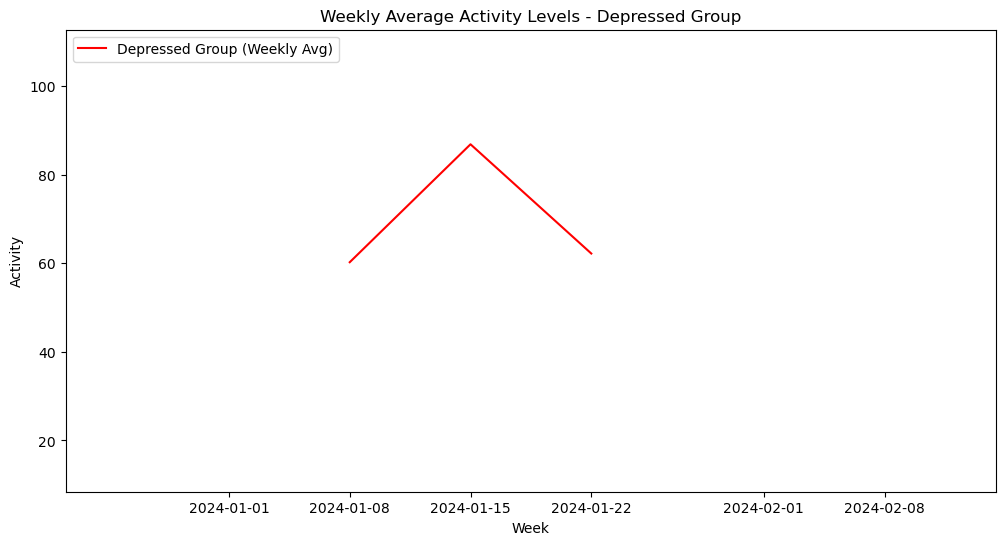

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load control20.csv and condition20.csv
control_df = pd.read_csv('ndep.csv')
condition_df = pd.read_csv('dep.csv')

# Convert 'timestamp' column to datetime format
control_df['timestamp'] = pd.to_datetime(control_df['timestamp'])
condition_df['timestamp'] = pd.to_datetime(condition_df['timestamp'])

# Calculate hourly averages for both groups
control_df['date'] = control_df['timestamp'].dt.floor('H')  # Round timestamp to nearest hour
condition_df['date'] = condition_df['timestamp'].dt.floor('H')  # Round timestamp to nearest hour

control_hourly_avg = control_df.groupby('date')['activity'].mean()
condition_hourly_avg = condition_df.groupby('date')['activity'].mean()

# Convert index to datetime for hourly averages
control_hourly_avg.index = pd.to_datetime(control_hourly_avg.index)
condition_hourly_avg.index = pd.to_datetime(condition_hourly_avg.index)

# Calculate daily trends (every 24 hours) for both groups
control_daily_avg = control_hourly_avg.resample('24H').mean()
condition_daily_avg = condition_hourly_avg.resample('24H').mean()

# Calculate weekly trends (every 7*24 hours) for both groups
control_weekly_avg = control_hourly_avg.resample('168H').mean()
condition_weekly_avg = condition_hourly_avg.resample('168H').mean()

# Plotting daily trends for control group
plt.figure(figsize=(12, 6))
plt.plot(control_daily_avg.index, control_daily_avg.values, label='Non-Depressed Group (Daily Avg)', color='blue')
plt.title('Daily Average Activity Levels - Non-Depressed Group')
plt.xlabel('Date')
plt.ylabel('Activity')
plt.legend()
plt.show()

# Plotting daily trends for condition group
plt.figure(figsize=(12, 6))
plt.plot(condition_daily_avg.index, condition_daily_avg.values, label='Depressed Group (Daily Avg)', color='red')
plt.title('Daily Average Activity Levels - Depressed Group')
plt.xlabel('Date')
plt.ylabel('Activity')
plt.legend()
plt.show()

# Plotting weekly trends for control group
plt.figure(figsize=(12, 6))
plt.plot(control_weekly_avg.index, control_weekly_avg.values, label='Non-Depressed Group (Weekly Avg)', color='blue')
plt.title('Weekly Average Activity Levels - Non-Depressed Group')
plt.xlabel('Week')
plt.ylabel('Activity')
plt.legend()
plt.show()

# Plotting weekly trends for condition group
plt.figure(figsize=(12, 6))
plt.plot(condition_weekly_avg.index, condition_weekly_avg.values, label='Depressed Group (Weekly Avg)', color='red')
plt.title('Weekly Average Activity Levels - Depressed Group')
plt.xlabel('Week')
plt.ylabel('Activity')
plt.legend()
plt.show()


C:\Users\Hp\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Hp\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Hp\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Hp\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


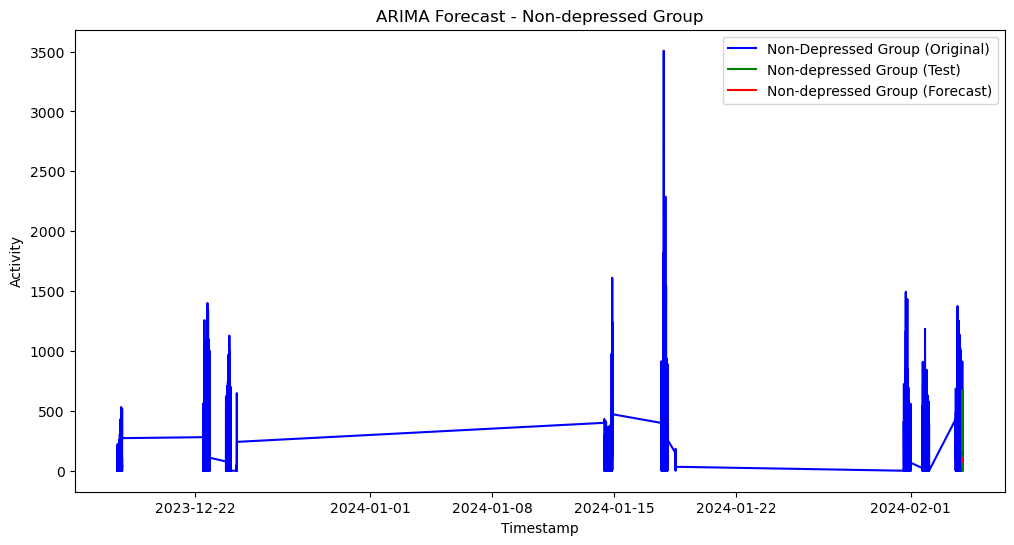

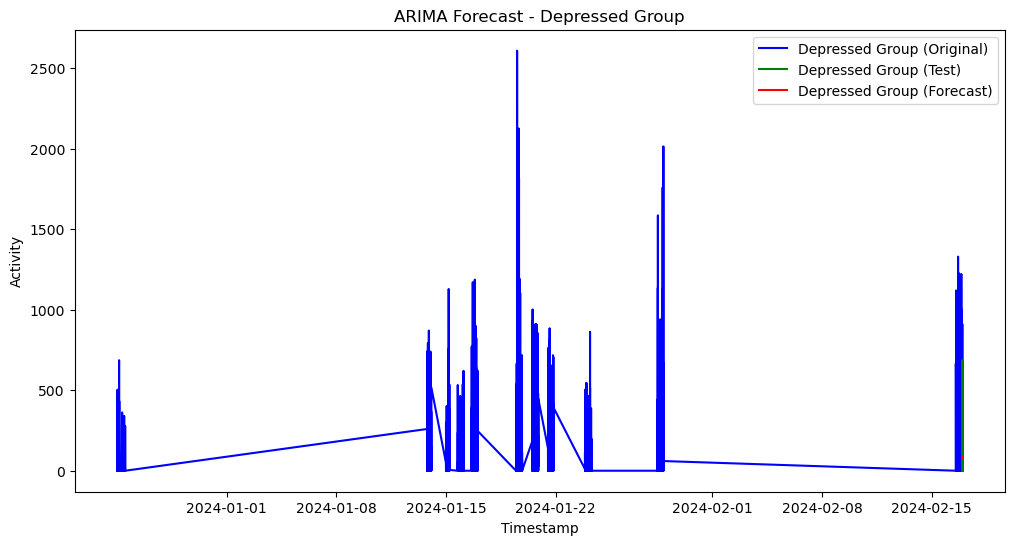

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Load control20.csv and condition20.csv
control_df = pd.read_csv('ndep.csv')
condition_df = pd.read_csv('dep.csv')

# Convert 'timestamp' column to datetime format and set as index
control_df['timestamp'] = pd.to_datetime(control_df['timestamp'])
condition_df['timestamp'] = pd.to_datetime(condition_df['timestamp'])

control_df.set_index('timestamp', inplace=True)
condition_df.set_index('timestamp', inplace=True)

# Split the data into training and testing sets
train_control = control_df['activity'][:-30]  # Use last 30 points for testing
test_control = control_df['activity'][-30:]

train_condition = condition_df['activity'][:-30]  # Use last 30 points for testing
test_condition = condition_df['activity'][-30:]

# Fit ARIMA models to the training data
control_model = ARIMA(train_control, order=(5, 1, 0))  # Example parameters (p, d, q)
control_results = control_model.fit()

condition_model = ARIMA(train_condition, order=(5, 1, 0))  # Example parameters (p, d, q)
condition_results = condition_model.fit()

# Forecast using the trained models
control_forecast = control_results.forecast(steps=len(test_control))
condition_forecast = condition_results.forecast(steps=len(test_condition))

# Plotting original and forecasted data for control group
plt.figure(figsize=(12, 6))
plt.plot(control_df.index, control_df['activity'], label='Non-Depressed Group (Original)', color='blue')
plt.plot(test_control.index, test_control, label='Non-depressed Group (Test)', color='green')
plt.plot(test_control.index, control_forecast, label='Non-depressed Group (Forecast)', color='red')
plt.title('ARIMA Forecast - Non-depressed Group')
plt.xlabel('Timestamp')
plt.ylabel('Activity')
plt.legend()
plt.show()

# Plotting original and forecasted data for condition group
plt.figure(figsize=(12, 6))
plt.plot(condition_df.index, condition_df['activity'], label='Depressed Group (Original)', color='blue')
plt.plot(test_condition.index, test_condition, label='Depressed Group (Test)', color='green')
plt.plot(test_condition.index, condition_forecast, label='Depressed Group (Forecast)', color='red')
plt.title('ARIMA Forecast - Depressed Group')
plt.xlabel('Timestamp')
plt.ylabel('Activity')
plt.legend()
plt.show()


In [5]:

# Calculate count of activity values greater than 4000 for control group
control_greater_than_4000 = control_df[control_df['activity'] > 4000]['activity'].count()

# Calculate count of activity values greater than 4000 for condition group
condition_greater_than_4000 = condition_df[condition_df['activity'] > 4000]['activity'].count()

print(f"Control Group: Number of activity values greater than 4000: {control_greater_than_4000}")
print(f"Condition Group: Number of activity values greater than 4000: {condition_greater_than_4000}")


Control Group: Number of activity values greater than 4000: 0
Condition Group: Number of activity values greater than 4000: 0


In [9]:
# control_counts

In [10]:
# condition_counts

In [12]:

# Define thresholds
thresholds = [100, 200, 500, 1000, 2000, 3000]

# Calculate counts for each threshold in control group
control_counts = [control_df[control_df['activity'] > threshold]['activity'].count() for threshold in thresholds]

# Calculate counts for each threshold in condition group
condition_counts = [condition_df[condition_df['activity'] > threshold]['activity'].count() for threshold in thresholds]

# Display counts for control and condition groups
for idx, threshold in enumerate(thresholds):
    print(f"Non-Depressed Group: Number of activity values greater than {threshold}: {control_counts[idx]}")
    print(f"Depressed Group: Number of activity values greater than {threshold}: {condition_counts[idx]}\n")


Non-Depressed Group: Number of activity values greater than 100: 5057
Depressed Group: Number of activity values greater than 100: 5635

Non-Depressed Group: Number of activity values greater than 200: 3041
Depressed Group: Number of activity values greater than 200: 3087

Non-Depressed Group: Number of activity values greater than 500: 564
Depressed Group: Number of activity values greater than 500: 409

Non-Depressed Group: Number of activity values greater than 1000: 89
Depressed Group: Number of activity values greater than 1000: 33

Non-Depressed Group: Number of activity values greater than 2000: 2
Depressed Group: Number of activity values greater than 2000: 3

Non-Depressed Group: Number of activity values greater than 3000: 1
Depressed Group: Number of activity values greater than 3000: 0



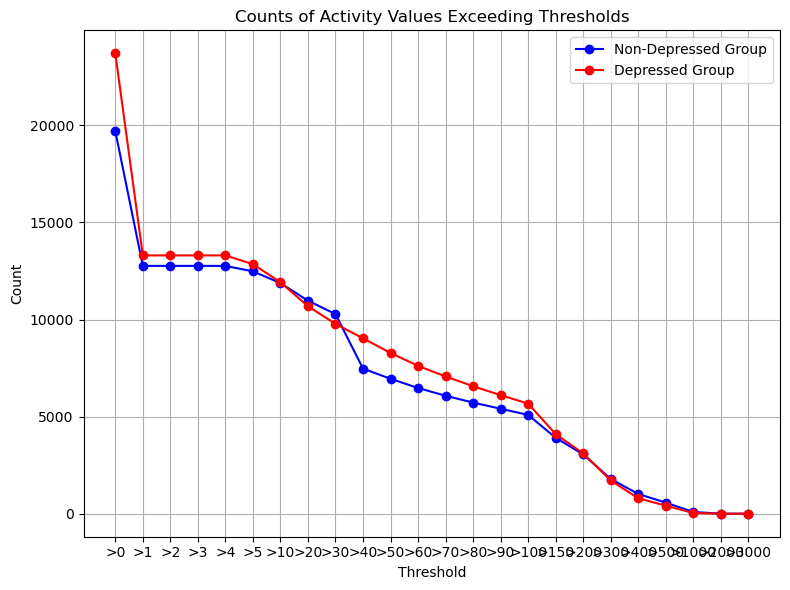

In [13]:

# Define thresholds
thresholds = [0, 1, 2, 3, 4, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 150, 200, 300, 400, 500, 1000, 2000, 3000]

# Calculate counts for each threshold in control group
control_counts = [control_df[control_df['activity'] >= threshold]['activity'].count() for threshold in thresholds]

# Calculate counts for each threshold in condition group
condition_counts = [condition_df[condition_df['activity'] >= threshold]['activity'].count() for threshold in thresholds]

# Create x-axis labels for thresholds
threshold_labels = [f">{threshold}" for threshold in thresholds]

# Plotting the line plot
plt.figure(figsize=(8, 6))
plt.plot(threshold_labels, control_counts, label='Non-Depressed Group', marker='o', color='blue')
plt.plot(threshold_labels, condition_counts, label='Depressed Group', marker='o', color='red')

plt.xlabel('Threshold')
plt.ylabel('Count')
plt.title('Counts of Activity Values Exceeding Thresholds')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
# Load control20.csv and condition20.csv
control_df = pd.read_csv('ndep.csv')
condition_df = pd.read_csv('dep.csv')

In [15]:

# Define thresholds
thresholds = [0,1, 100]

# Calculate counts for each threshold in control group
control_counts = [control_df[control_df['activity'] <= threshold]['activity'].count() for threshold in thresholds]

# Calculate counts for each threshold in condition group
condition_counts = [condition_df[condition_df['activity'] <= threshold]['activity'].count() for threshold in thresholds]

# Display counts for control and condition groups
for idx, threshold in enumerate(thresholds):
    print(f"Non-Depressed Group: Number of activity values greater than {threshold}: {control_counts[idx]}")
    print(f"Depressed Group: Number of activity values greater than {threshold}: {condition_counts[idx]}\n")

Non-Depressed Group: Number of activity values greater than 0: 6944
Depressed Group: Number of activity values greater than 0: 10407

Non-Depressed Group: Number of activity values greater than 1: 6944
Depressed Group: Number of activity values greater than 1: 10407

Non-Depressed Group: Number of activity values greater than 100: 14651
Depressed Group: Number of activity values greater than 100: 18076



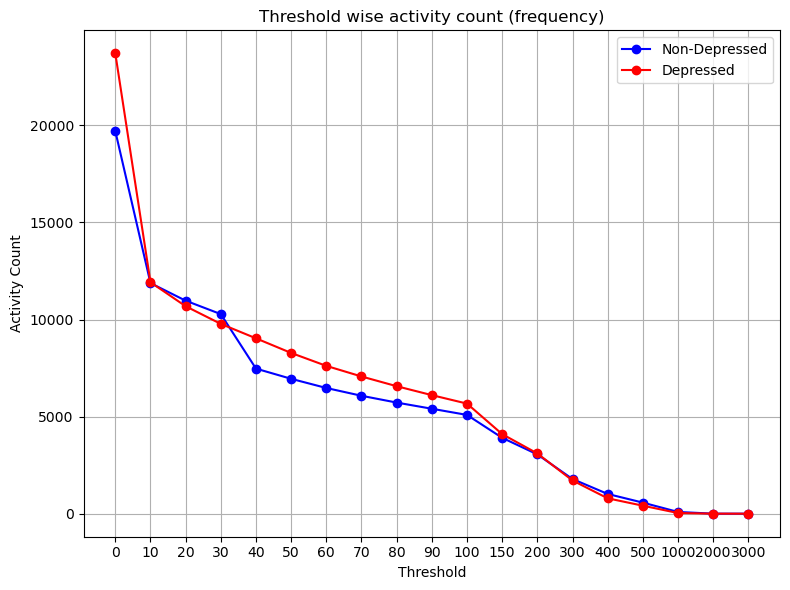

In [16]:

# Define thresholds
thresholds = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 150, 200, 300, 400, 500, 1000, 2000, 3000]

# Calculate counts for each threshold in control group
control_counts = [control_df[control_df['activity'] >= threshold]['activity'].count() for threshold in thresholds]

# Calculate counts for each threshold in condition group
condition_counts = [condition_df[condition_df['activity'] >= threshold]['activity'].count() for threshold in thresholds]

# Create x-axis labels for thresholds
threshold_labels = [f"{threshold}" for threshold in thresholds]

# Plotting the line plot
plt.figure(figsize=(8, 6))
plt.plot(threshold_labels, control_counts, label='Non-Depressed', marker='o', color='blue')
plt.plot(threshold_labels, condition_counts, label='Depressed', marker='o', color='red')

plt.xlabel('Threshold')
plt.ylabel('Activity Count')
plt.title('Threshold wise activity count (frequency)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


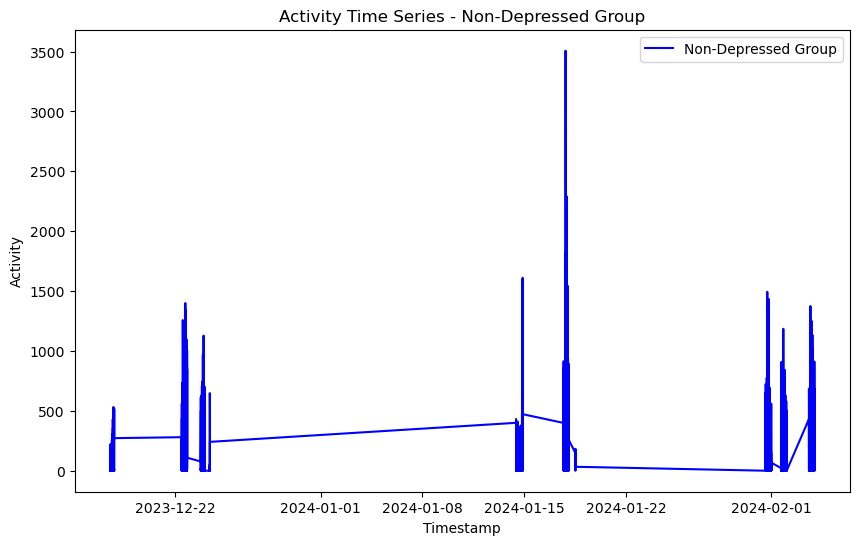

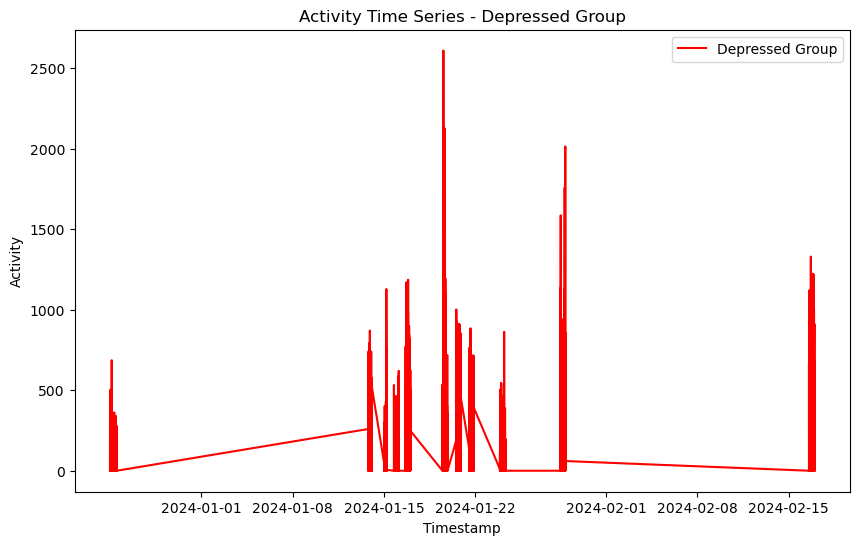

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Load control20.csv and condition20.csv
control_df = pd.read_csv('ndep.csv')
condition_df = pd.read_csv('dep.csv')

# Convert 'timestamp' column to datetime format
control_df['timestamp'] = pd.to_datetime(control_df['timestamp'])
condition_df['timestamp'] = pd.to_datetime(condition_df['timestamp'])

# Plot time series for control group
plt.figure(figsize=(10, 6))
plt.plot(control_df['timestamp'], control_df['activity'], label='Non-Depressed Group', color='blue')
plt.title('Activity Time Series - Non-Depressed Group')
plt.xlabel('Timestamp')
plt.ylabel('Activity')
plt.legend()
plt.show()

# Plot time series for depressed group
plt.figure(figsize=(10, 6))
plt.plot(condition_df['timestamp'], condition_df['activity'], label='Depressed Group', color='red')
plt.title('Activity Time Series - Depressed Group')
plt.xlabel('Timestamp')
plt.ylabel('Activity')
plt.legend()
plt.show()


In [18]:
# Load control20.csv and condition20.csv
control_df = pd.read_csv('ndep.csv')
condition_df = pd.read_csv('dep.csv')

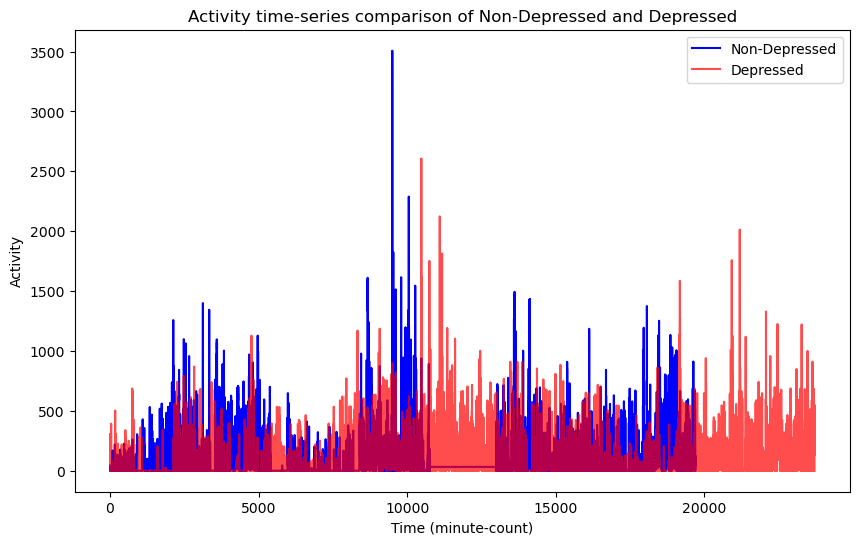

In [19]:
# Plotting activity row number-wise for both groups on the same figure
plt.figure(figsize=(10, 6))

# Plot activity row number-wise for control group
plt.plot(control_df.index, control_df['activity'], label='Non-Depressed', color='blue')

# Plot activity row number-wise for depressed group on the same axes
plt.plot(condition_df.index, condition_df['activity'], label='Depressed', color='red', alpha=0.7)

plt.title('Activity time-series comparison of Non-Depressed and Depressed')
plt.xlabel('Time (minute-count)')
plt.ylabel('Activity')
plt.legend()
plt.show()

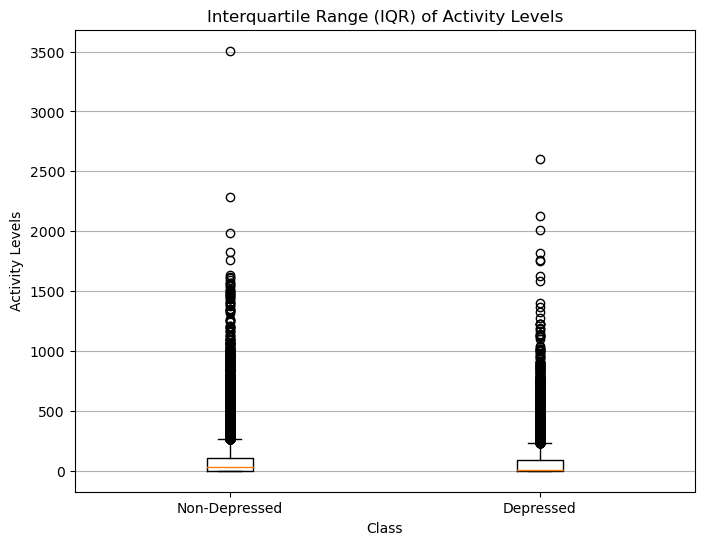

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Load control20.csv and condition20.csv
control_df = pd.read_csv('ndep.csv')
condition_df = pd.read_csv('dep.csv')

# Create a boxplot to visualize the IQR of activity levels for both groups
plt.figure(figsize=(8, 6))
plt.boxplot([control_df['activity'], condition_df['activity']], labels=['Non-Depressed', 'Depressed'])

plt.title('Interquartile Range (IQR) of Activity Levels')
plt.xlabel('Class')
plt.ylabel('Activity Levels')
plt.grid(axis='y')
plt.show()


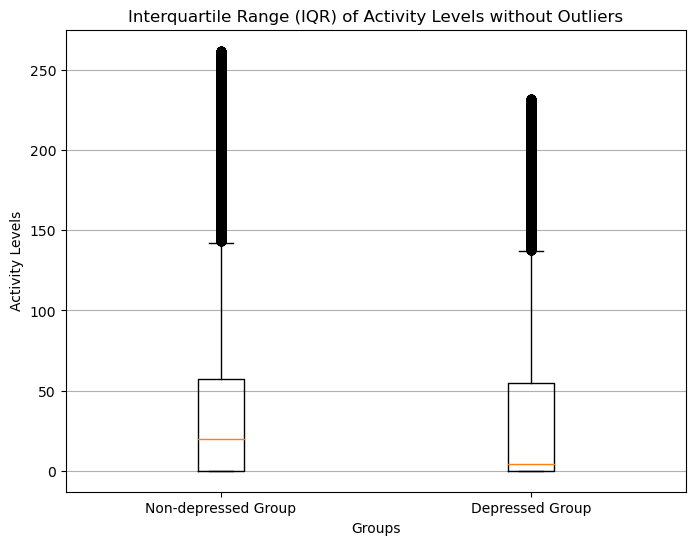

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Load control20.csv and condition20.csv
control_df = pd.read_csv('ndep.csv')
condition_df = pd.read_csv('dep.csv')

# Define a function to remove outliers based on IQR
def remove_outliers(df):
    Q1 = df['activity'].quantile(0.25)
    Q3 = df['activity'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df['activity'] >= lower_bound) & (df['activity'] <= upper_bound)]

# Remove outliers from control and condition groups
filtered_control = remove_outliers(control_df)
filtered_condition = remove_outliers(condition_df)

# Create boxplots after removing outliers
plt.figure(figsize=(8, 6))
plt.boxplot([filtered_control['activity'], filtered_condition['activity']], labels=['Non-depressed Group', 'Depressed Group'])

plt.title('Interquartile Range (IQR) of Activity Levels without Outliers')
plt.xlabel('Groups')
plt.ylabel('Activity Levels')
plt.grid(axis='y')
plt.show()


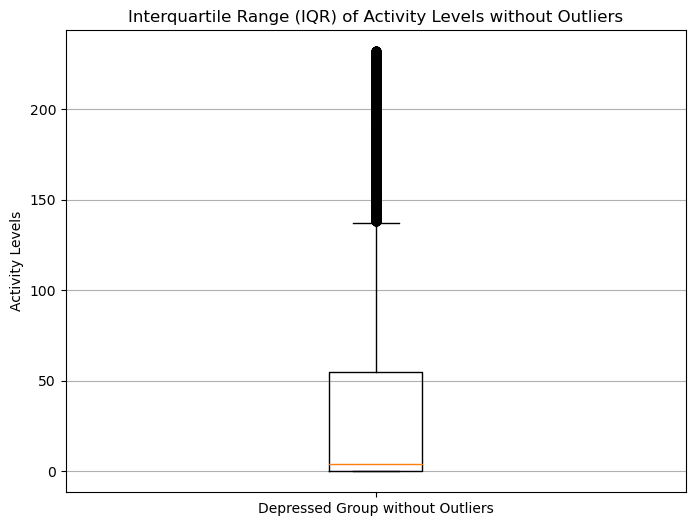

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Load condition_20.csv
condition_df = pd.read_csv('dep.csv')

# Define a function to remove outliers based on IQR
def remove_outliers(df):
    Q1 = df['activity'].quantile(0.25)
    Q3 = df['activity'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df['activity'] >= lower_bound) & (df['activity'] <= upper_bound)]

# Remove outliers from condition group
filtered_condition = remove_outliers(condition_df)

# Create a boxplot after removing outliers
plt.figure(figsize=(8, 6))
plt.boxplot(filtered_condition['activity'], labels=['Depressed Group without Outliers'])

plt.title('Interquartile Range (IQR) of Activity Levels without Outliers')
plt.ylabel('Activity Levels')
plt.grid(axis='y')
plt.show()


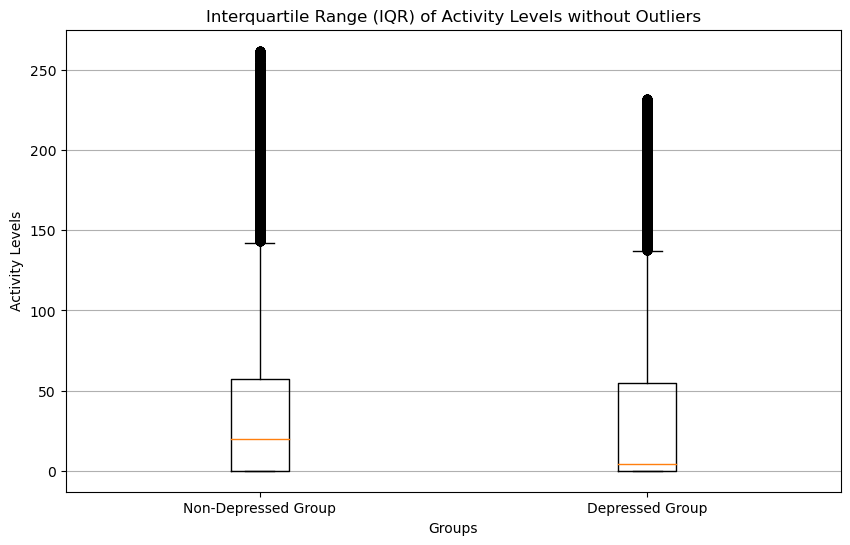

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Load control_20.csv and condition_20.csv
control_df = pd.read_csv('ndep.csv')
condition_df = pd.read_csv('dep.csv')

# Define a function to remove outliers based on IQR
def remove_outliers(df):
    Q1 = df['activity'].quantile(0.25)
    Q3 = df['activity'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df['activity'] >= lower_bound) & (df['activity'] <= upper_bound)]

# Remove outliers from control and condition groups
filtered_control = remove_outliers(control_df)
filtered_condition = remove_outliers(condition_df)

# Create boxplots after removing outliers for both groups
plt.figure(figsize=(10, 6))

plt.boxplot([filtered_control['activity'], filtered_condition['activity']], labels=['Non-Depressed Group', 'Depressed Group'])

plt.title('Interquartile Range (IQR) of Activity Levels without Outliers')
plt.xlabel('Groups')
plt.ylabel('Activity Levels')
plt.grid(axis='y')
plt.show()


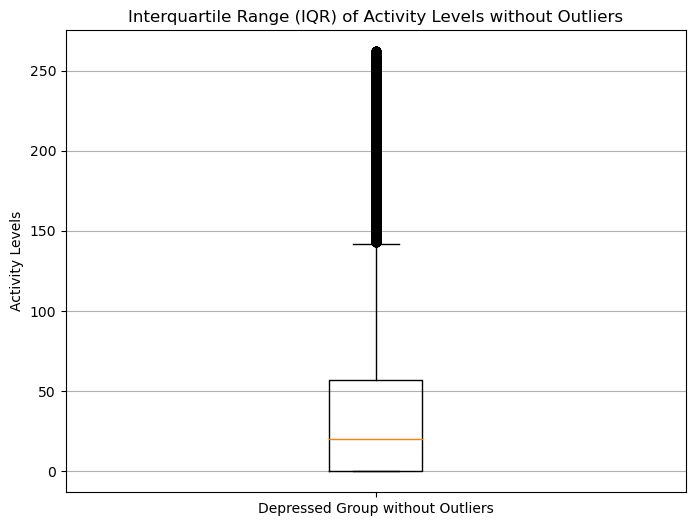

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Load condition_20.csv
condition_df = pd.read_csv('ndep.csv')

# Define a function to remove outliers based on IQR
def remove_outliers(df):
    Q1 = df['activity'].quantile(0.25)
    Q3 = df['activity'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df['activity'] >= lower_bound) & (df['activity'] <= upper_bound)]

# Remove outliers from condition group
filtered_condition = remove_outliers(condition_df)

# Create a boxplot after removing outliers
plt.figure(figsize=(8, 6))
plt.boxplot(filtered_condition['activity'], labels=['Depressed Group without Outliers'])

plt.title('Interquartile Range (IQR) of Activity Levels without Outliers')
plt.ylabel('Activity Levels')
plt.grid(axis='y')
plt.show()


In [26]:
# Load control20.csv and condition20.csv
control_df = pd.read_csv('ndep.csv')
condition_df = pd.read_csv('dep.csv')

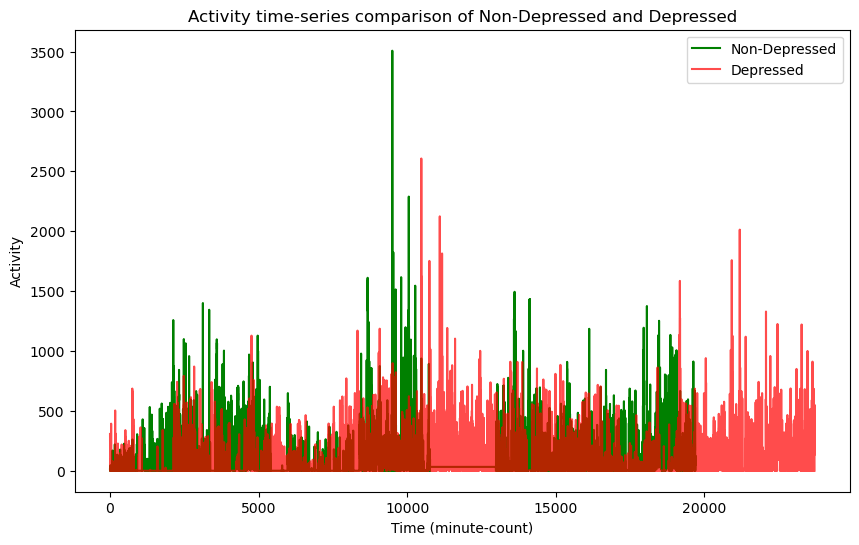

In [27]:
# Plotting activity row number-wise for both groups on the same figure
plt.figure(figsize=(10, 6))

# Plot activity row number-wise for control group
plt.plot(control_df.index, control_df['activity'], label='Non-Depressed', color='green')

# Plot activity row number-wise for depressed group on the same axes
plt.plot(condition_df.index, condition_df['activity'], label='Depressed', color='red', alpha=0.7)

plt.title('Activity time-series comparison of Non-Depressed and Depressed')
plt.xlabel('Time (minute-count)')
plt.ylabel('Activity')
plt.legend()
plt.show()

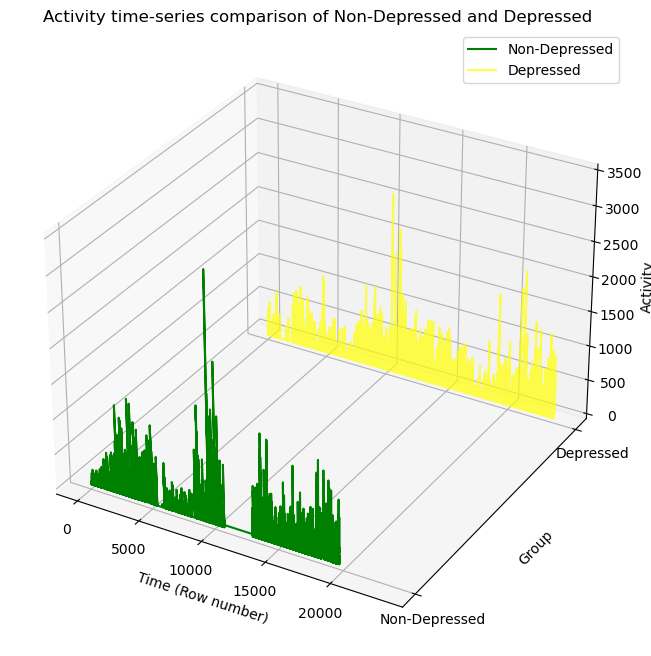

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load control_20.csv and condition_20.csv
control_df = pd.read_csv('ndep.csv')
condition_df = pd.read_csv('dep.csv')

# Create a 3D figure
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plotting 3D line plot for control group
ax.plot(control_df.index, control_df['activity'], zs=0, zdir='y', label='Non-Depressed', color='green')

# Plotting 3D line plot for depressed group
ax.plot(condition_df.index, condition_df['activity'], zs=1, zdir='y', label='Depressed', color='yellow', alpha=0.7)

# Set labels and title
ax.set_xlabel('Time (Row number)')
ax.set_ylabel('Group')
ax.set_zlabel('Activity')
ax.set_yticks([0, 1])
ax.set_yticklabels(['Non-Depressed', 'Depressed'])
ax.set_title('Activity time-series comparison of Non-Depressed and Depressed')

# Show legend and display plot
ax.legend()
plt.show()


In [31]:
# import pandas as pd
# import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D

# # Load control_20.csv
# control_df = pd.read_csv('ndep.csv')

# # Extracting numeric values from the dataframe
# data = control_df.drop(columns=['timestamp', 'date']).values

# # Set up figure and axis
# fig = plt.figure(figsize=(10, 8))
# ax = fig.add_subplot(111, projection='3d')

# # Plot each time step as a connected line
# for i in range(len(data)):
#     x = range(len(data[i]))  # Assuming each row represents a time step
#     y = [i] * len(data[i])
#     z = data[i]
    
#     ax.plot(x, y, z, color='blue')

# # Set axis labels and title
# ax.set_xlabel('Time Step')
# ax.set_ylabel('Time')
# ax.set_zlabel('Activity')
# ax.set_title('3D Plot with Lines Connecting Values for Each Time Step')

# # Show plot
# plt.show()


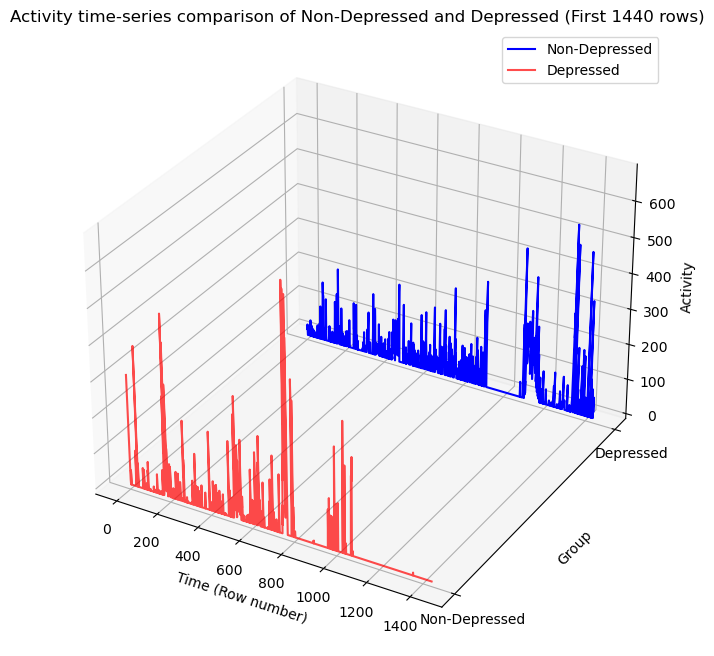

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load control_20.csv and condition_20.csv
control_df = pd.read_csv('ndep.csv').iloc[:1440]  # Selecting first 1440 rows
condition_df = pd.read_csv('dep.csv').iloc[:1440]  # Selecting first 1440 rows

# Create a 3D figure
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plotting 3D line plot for control group
ax.plot(range(len(control_df)), [1]*len(control_df), control_df['activity'], label='Non-Depressed', color='blue')

# Plotting 3D line plot for depressed group
ax.plot(range(len(condition_df)), [0]*len(condition_df), condition_df['activity'], label='Depressed', color='red', alpha=0.7)

# Set labels and title
ax.set_xlabel('Time (Row number)')
ax.set_ylabel('Group')
ax.set_zlabel('Activity')
ax.set_yticks([0, 1])
ax.set_yticklabels(['Non-Depressed', 'Depressed'])
ax.set_title('Activity time-series comparison of Non-Depressed and Depressed (First 1440 rows)')

# Show legend and display plot
ax.legend()
plt.show()


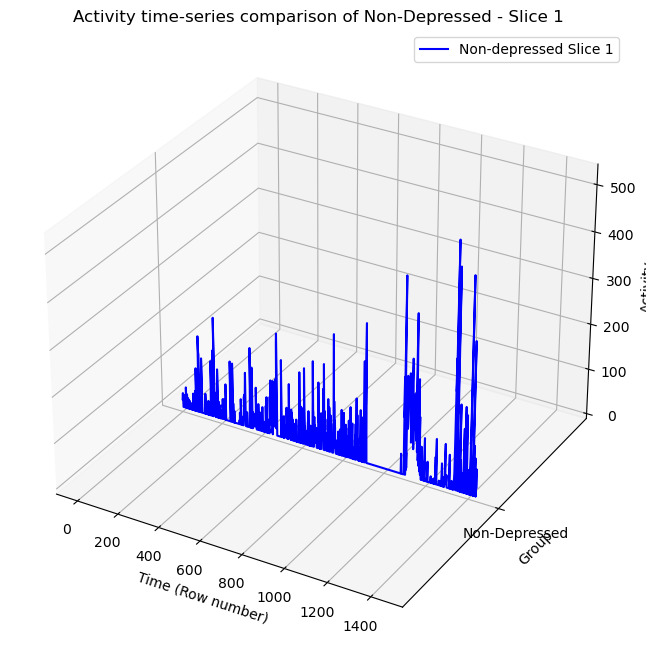

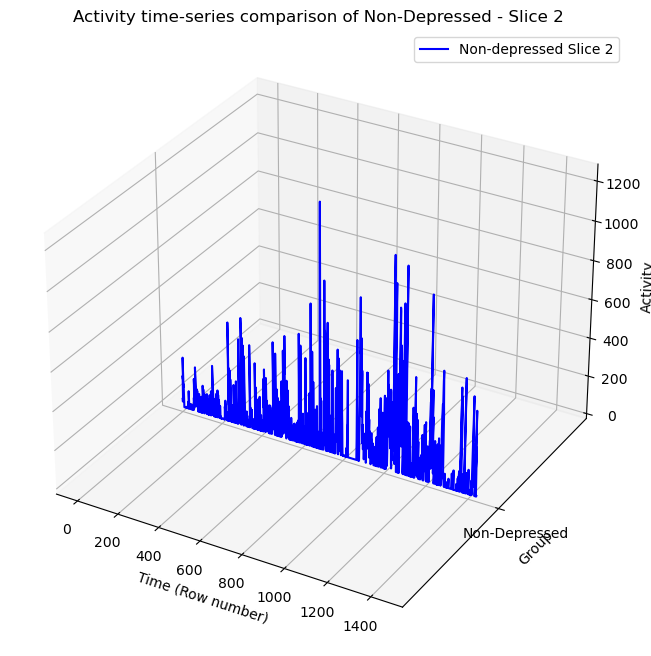

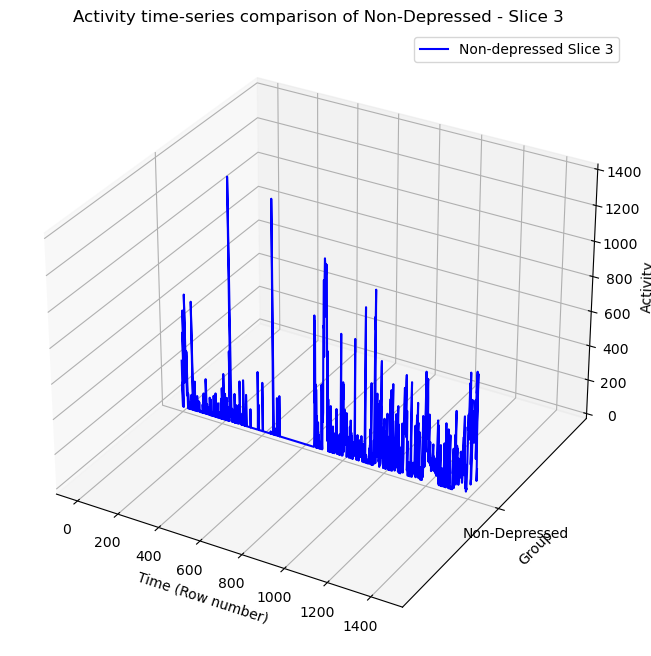

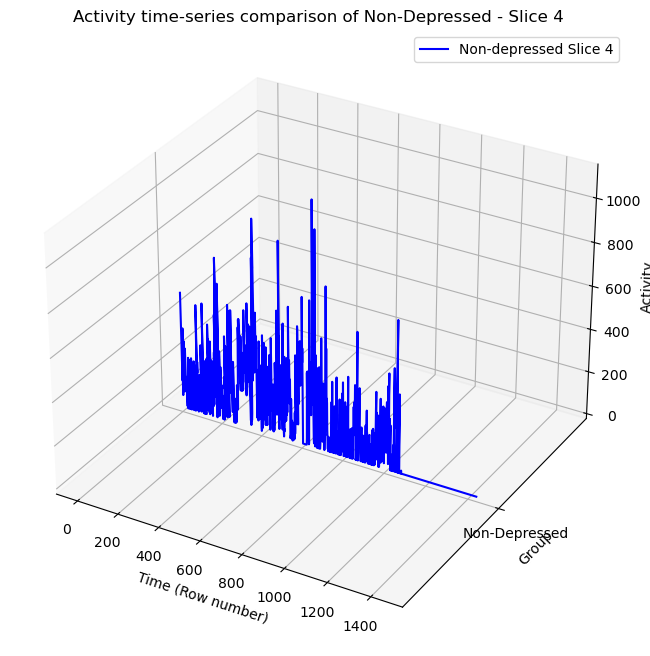

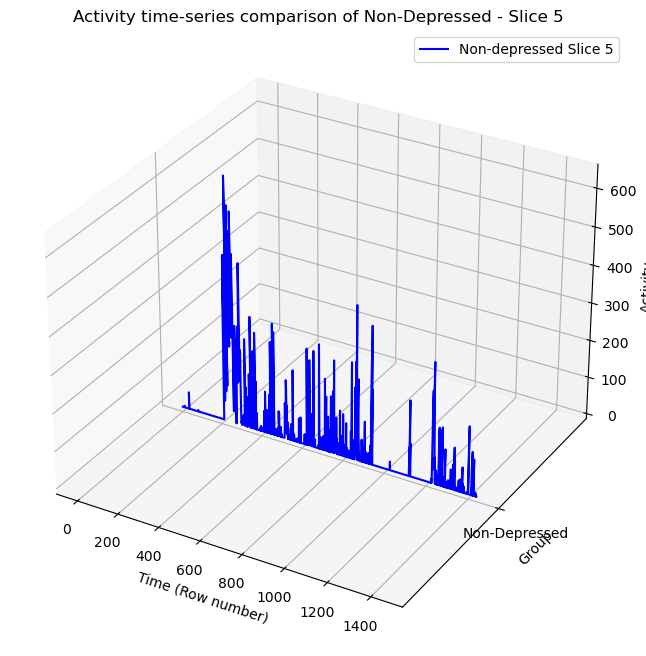

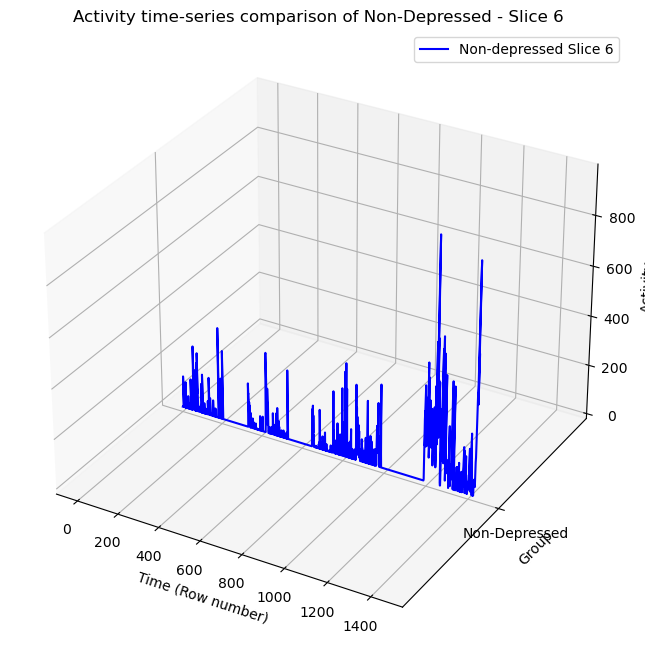

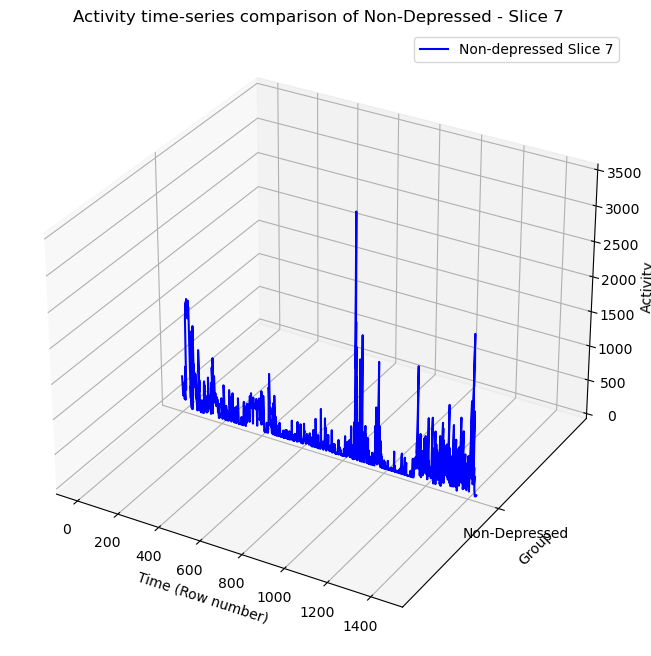

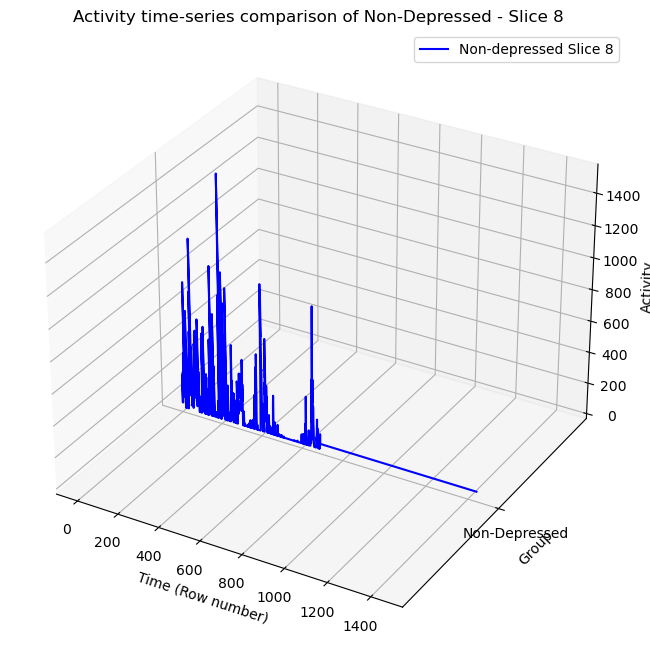

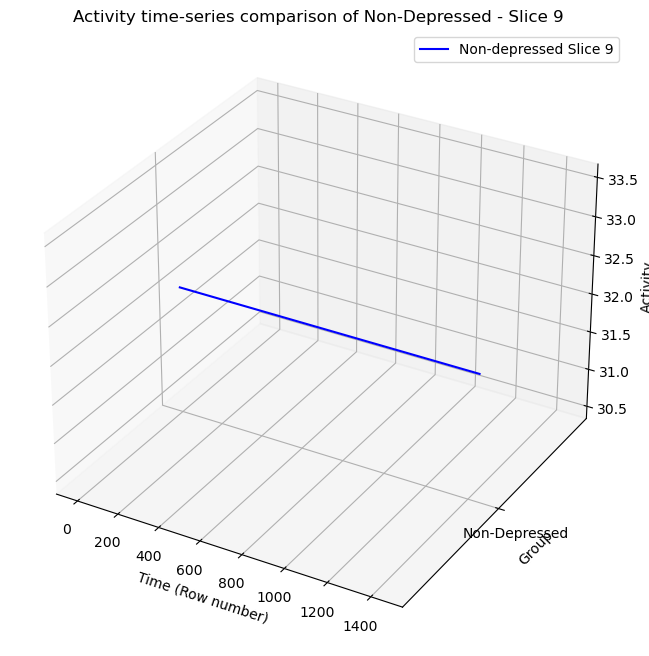

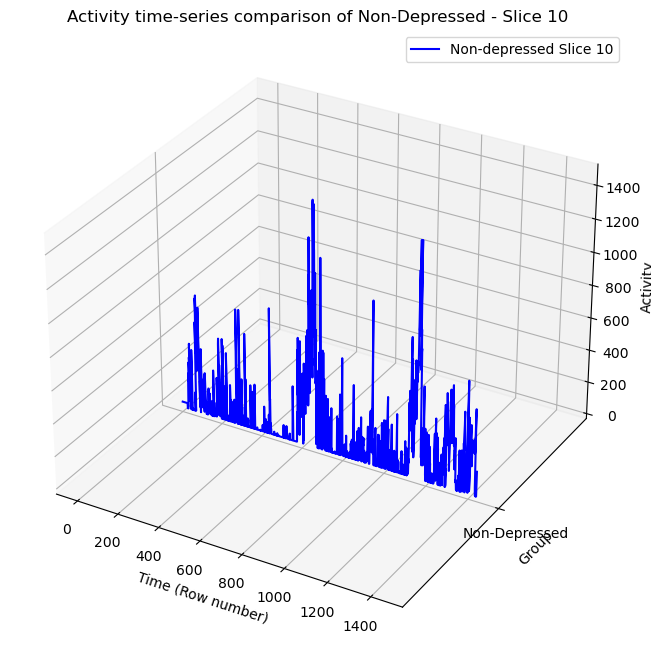

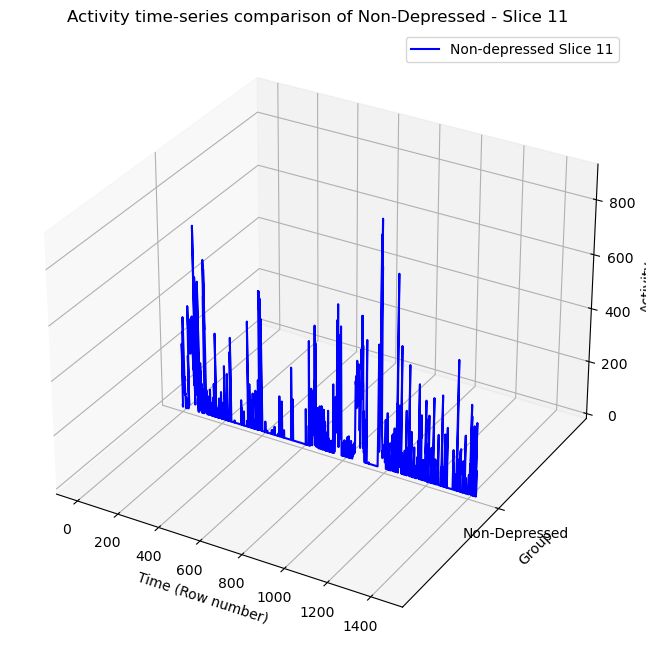

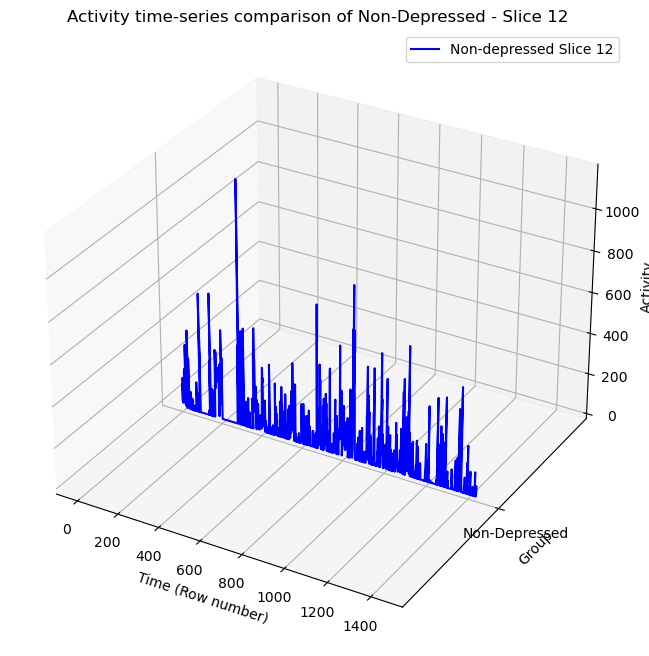

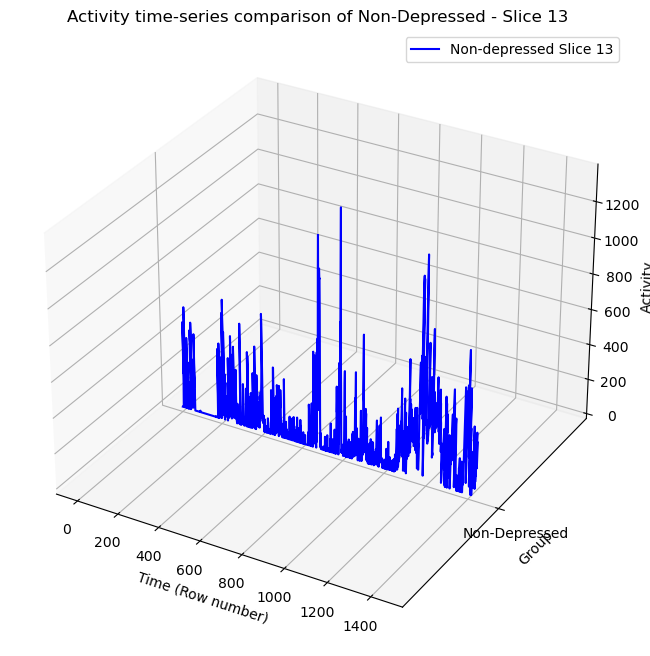

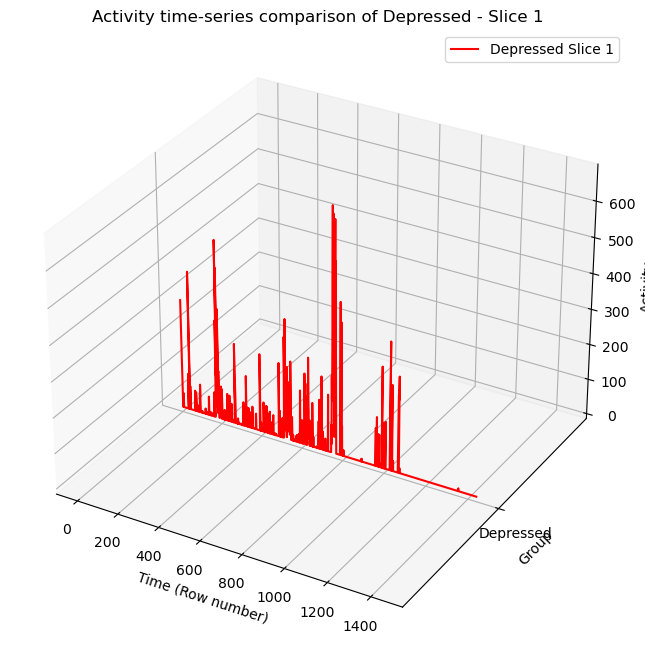

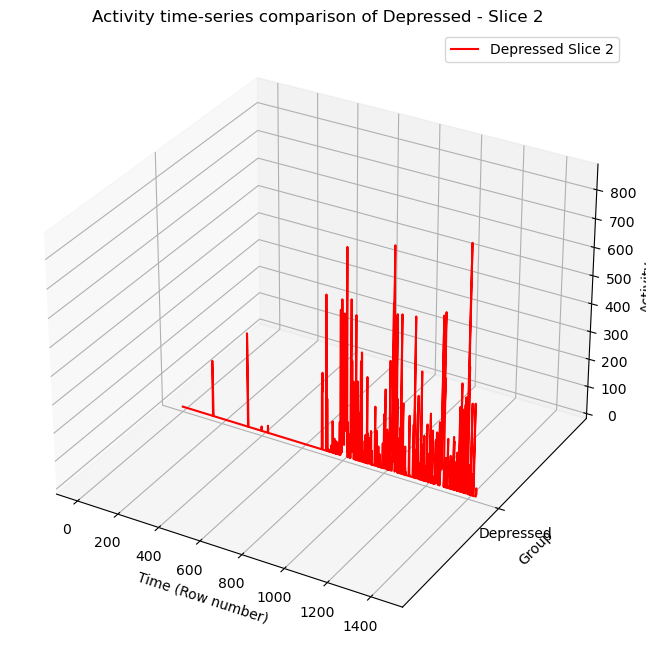

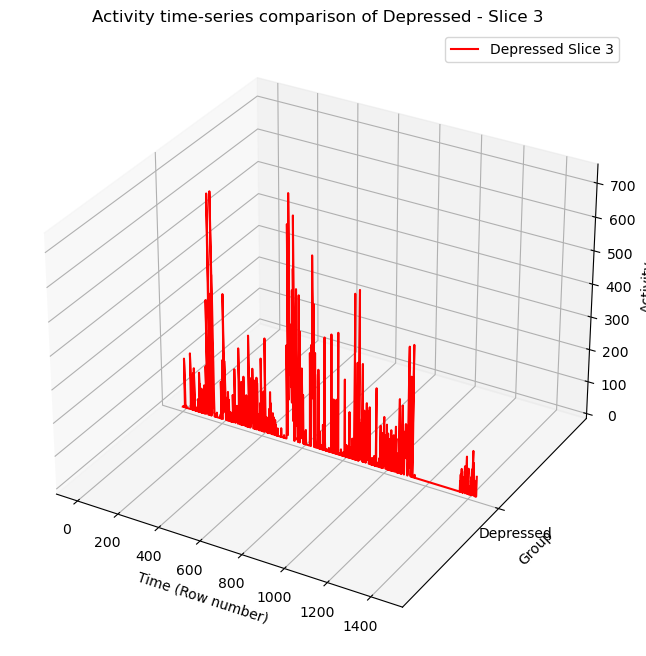

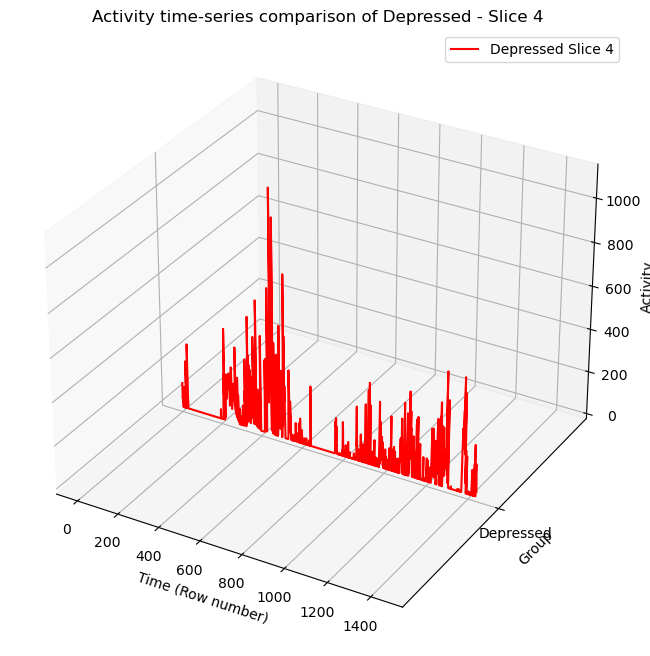

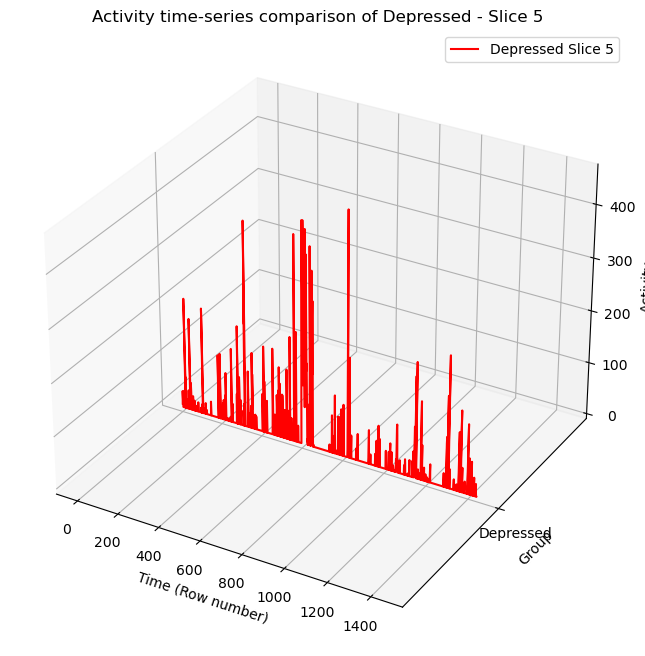

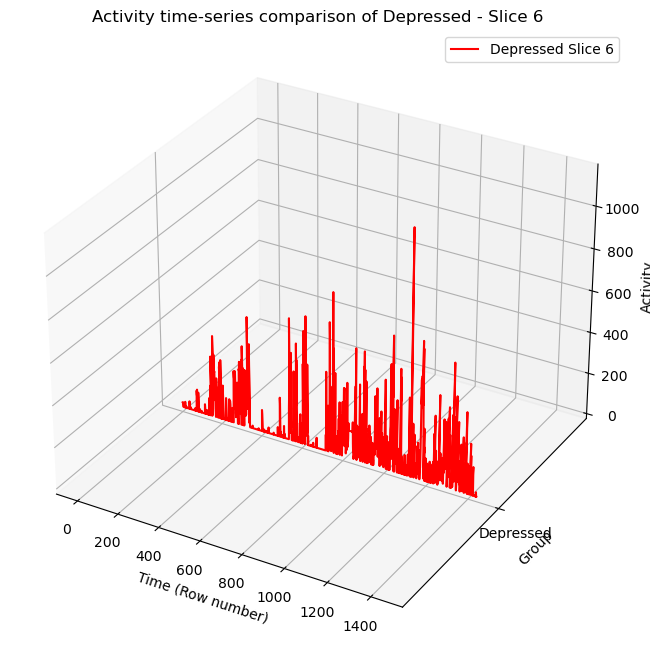

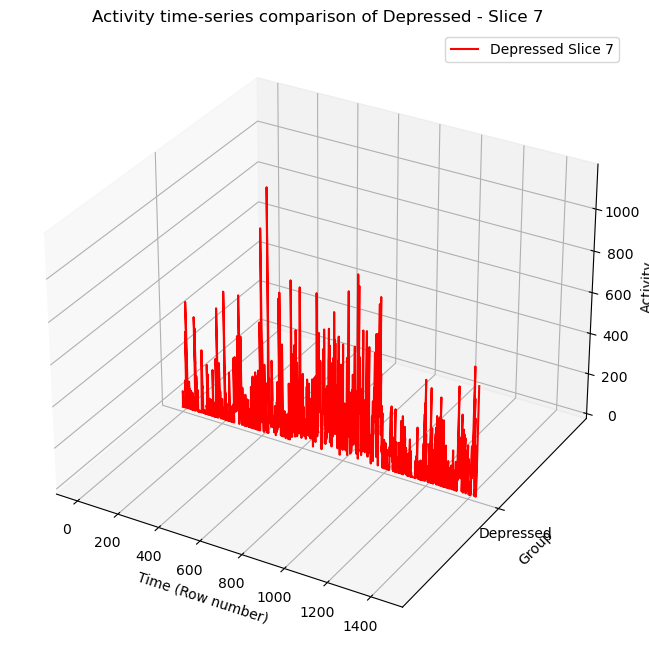

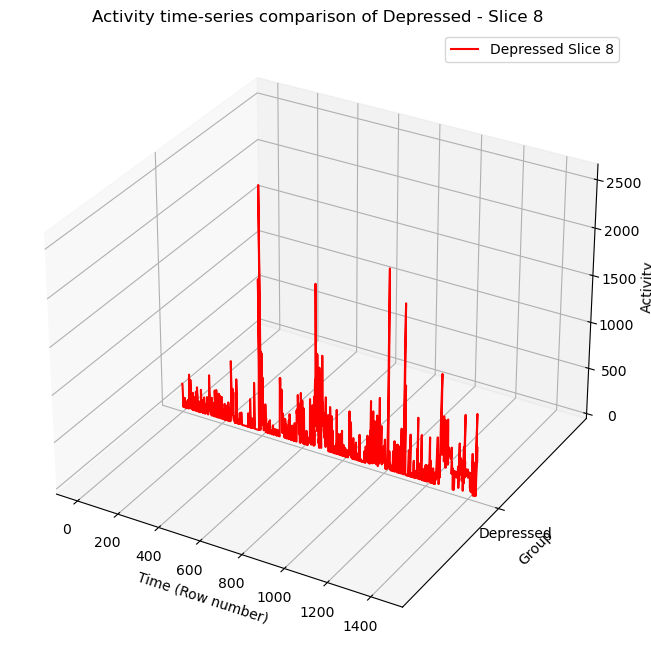

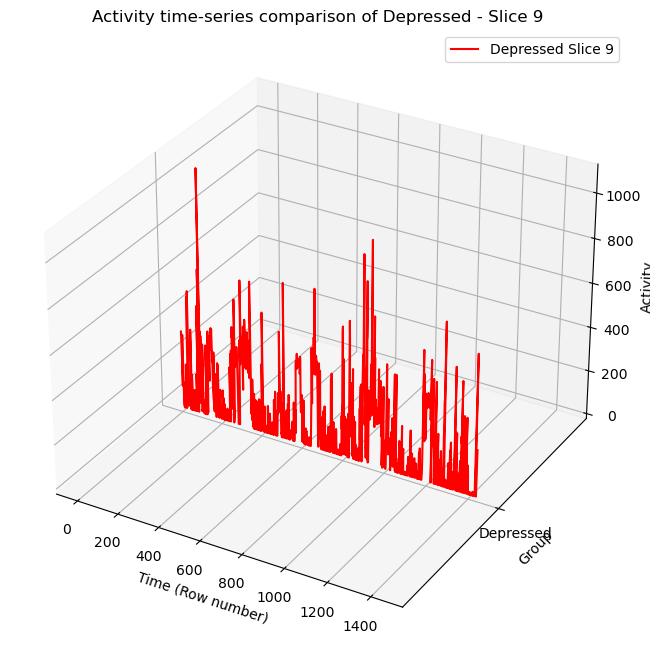

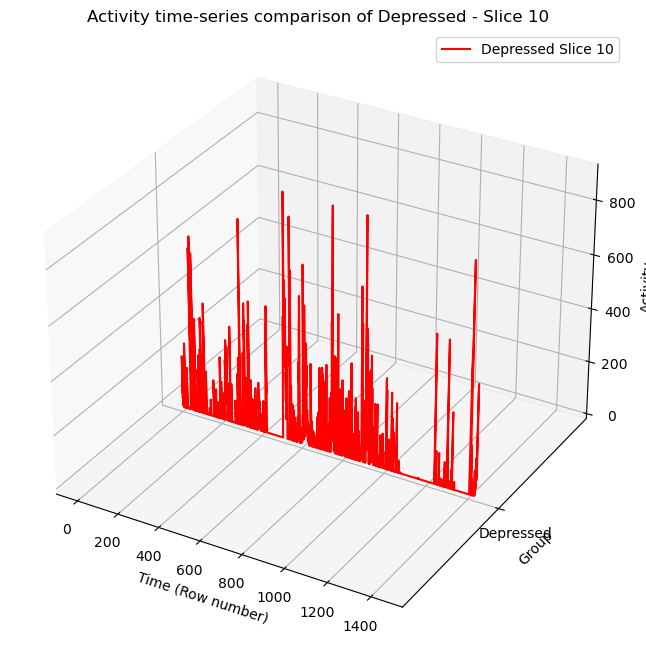

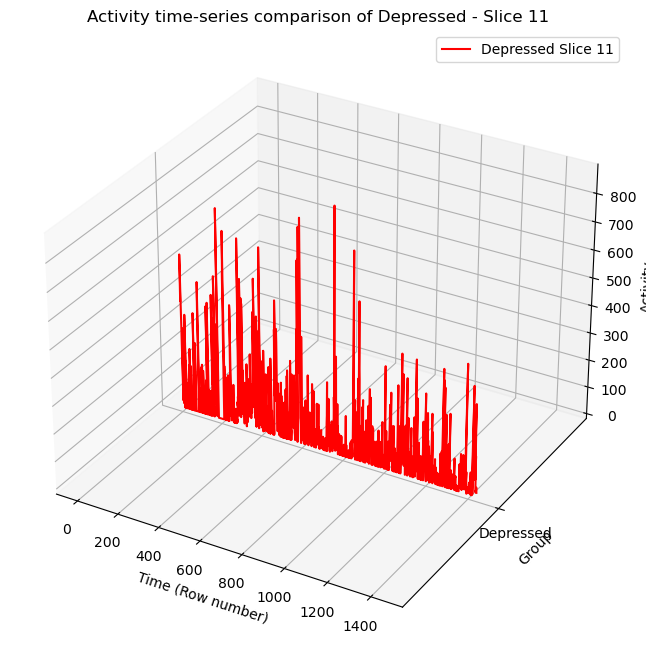

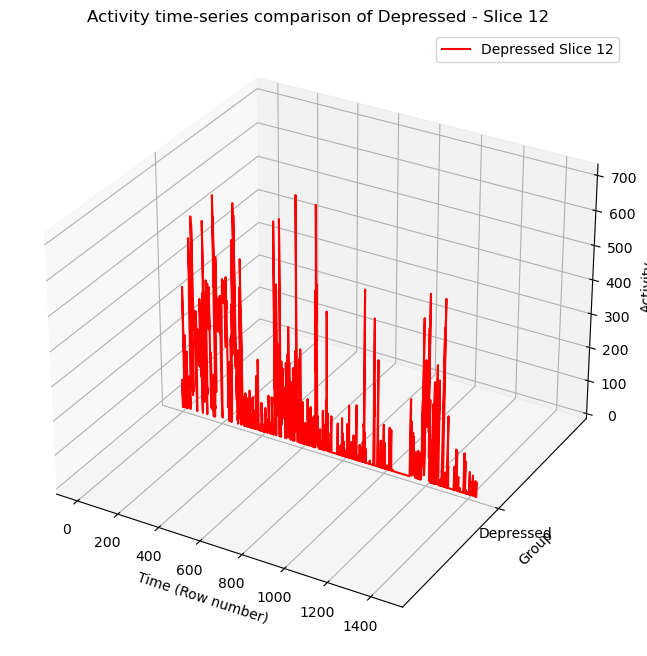

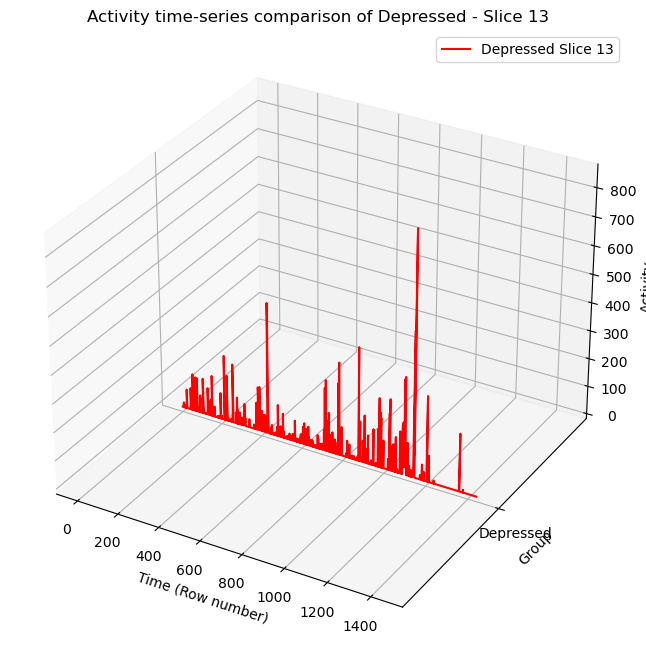

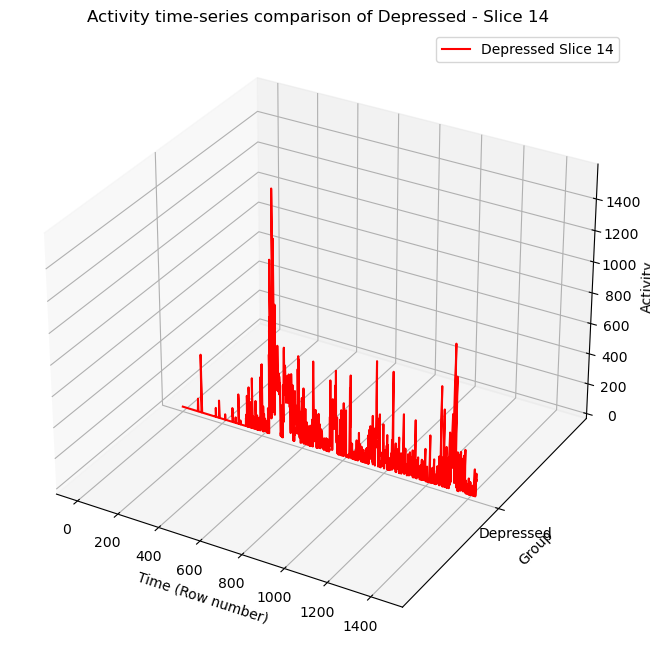

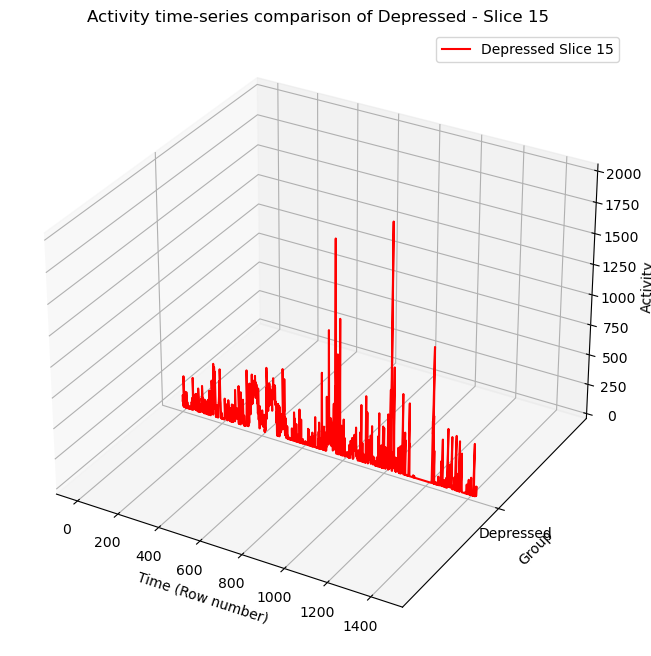

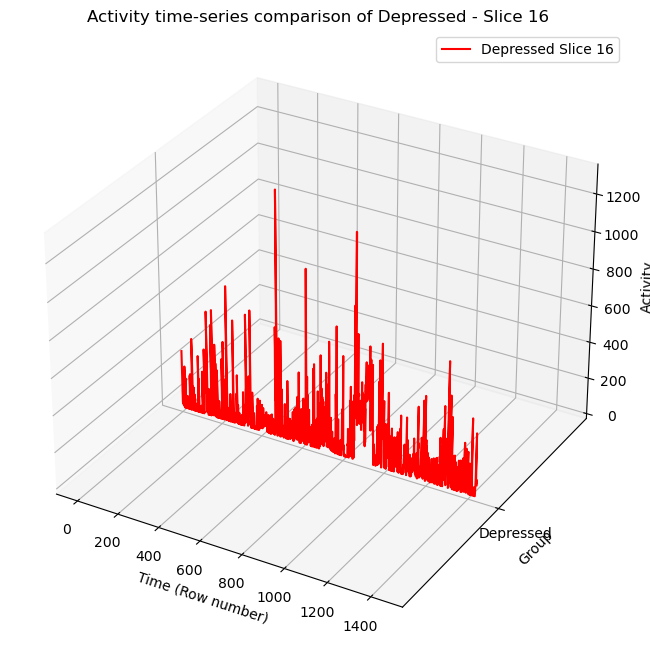

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load control_20.csv and condition_20.csv
control_df = pd.read_csv('ndep.csv')
condition_df = pd.read_csv('dep.csv')

# Splitting data into slices of 1440 rows
slice_size = 1440
num_slices_control = len(control_df) // slice_size
num_slices_condition = len(condition_df) // slice_size

# Create a figure for each slice of 1440 rows
for i in range(num_slices_control):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    # Get slice of control data
    slice_control = control_df.iloc[i * slice_size: (i + 1) * slice_size]
    
    # Plot 3D line plot for control group slice
    ax.plot(range(len(slice_control)), [0] * len(slice_control), slice_control['activity'],
            label=f'Non-depressed Slice {i+1}', color='blue')

    # Set labels and title for control slice plot
    ax.set_xlabel('Time (Row number)')
    ax.set_ylabel('Group')
    ax.set_zlabel('Activity')
    ax.set_yticks([0])
    ax.set_yticklabels(['Non-Depressed'])
    ax.set_title(f'Activity time-series comparison of Non-Depressed - Slice {i+1}')

    # Show legend and display plot
    ax.legend()
    plt.show()

# Repeat the process for condition data
for i in range(num_slices_condition):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    # Get slice of condition data
    slice_condition = condition_df.iloc[i * slice_size: (i + 1) * slice_size]
    
    # Plot 3D line plot for condition group slice
    ax.plot(range(len(slice_condition)), [0] * len(slice_condition), slice_condition['activity'],
            label=f'Depressed Slice {i+1}', color='red')

    # Set labels and title for condition slice plot
    ax.set_xlabel('Time (Row number)')
    ax.set_ylabel('Group')
    ax.set_zlabel('Activity')
    ax.set_yticks([0])
    ax.set_yticklabels(['Depressed'])
    ax.set_title(f'Activity time-series comparison of Depressed - Slice {i+1}')

    # Show legend and display plot
    ax.legend()
    plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


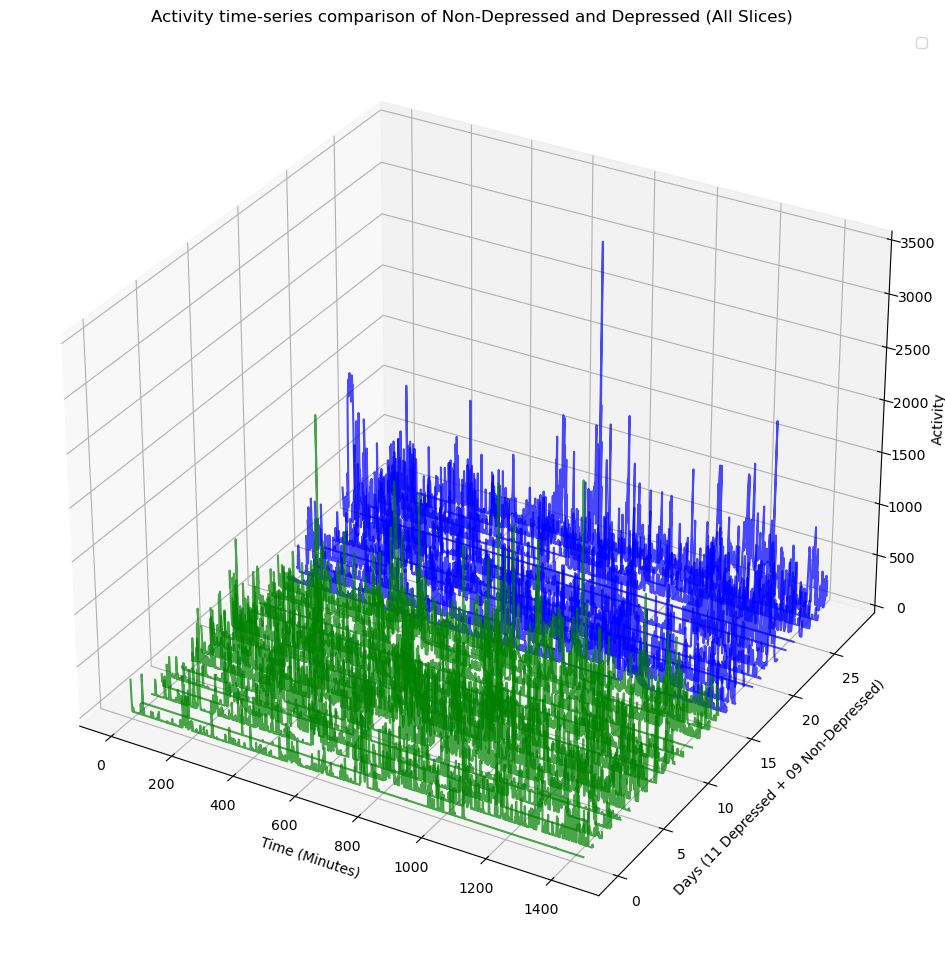

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load control_20.csv and condition_20.csv
control_df = pd.read_csv('ndep.csv')
condition_df = pd.read_csv('dep.csv')

# Splitting data into slices of 1440 rows
slice_size = 1440
num_slices_control = len(control_df) // slice_size
num_slices_condition = len(condition_df) // slice_size

# Create a figure for all slices combined
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111, projection='3d')

# Accumulate control slices
for i in range(num_slices_control):
    slice_control = control_df.iloc[i * slice_size: (i + 1) * slice_size]
    ax.plot(range(len(slice_control)), [i + num_slices_condition] * len(slice_control), slice_control['activity'],
             color='blue' ,alpha=.7)

# Accumulate condition slices
for i in range(num_slices_condition):
    slice_condition = condition_df.iloc[i * slice_size: (i + 1) * slice_size]
    ax.plot(range(len(slice_condition)), [i] * len(slice_condition),
            slice_condition['activity'], color='green' ,alpha=.7)

# Set labels and title for combined plot
ax.set_xlabel('Time (Minutes)')
ax.set_ylabel('Days (11 Depressed + 09 Non-Depressed)')
ax.set_zlabel('Activity')
ax.set_title('Activity time-series comparison of Non-Depressed and Depressed (All Slices)')

# Show legend and display plot
ax.legend()
plt.show()


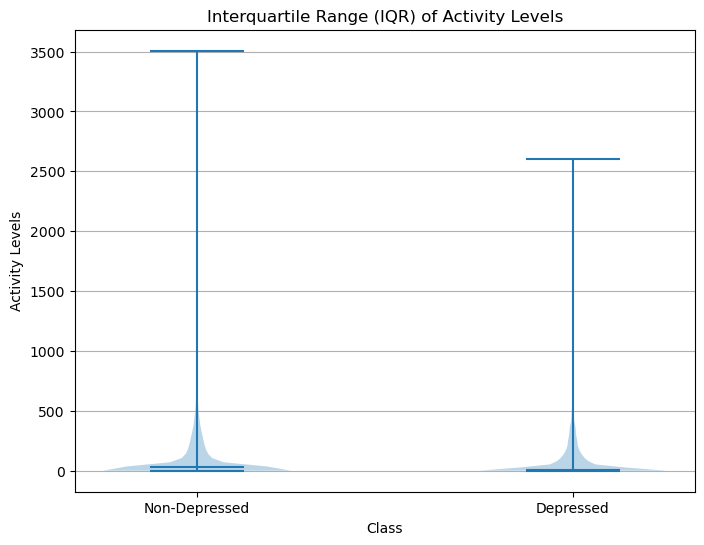

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# Load control20.csv and condition20.csv
control_df = pd.read_csv('ndep.csv')
condition_df = pd.read_csv('dep.csv')

# Create a violin plot to visualize the IQR of activity levels for both groups
plt.figure(figsize=(8, 6))
plt.violinplot([control_df['activity'], condition_df['activity']], showmedians=True)

plt.title('Interquartile Range (IQR) of Activity Levels')
plt.xlabel('Class')
plt.ylabel('Activity Levels')
plt.xticks([1, 2], ['Non-Depressed', 'Depressed'])
plt.grid(axis='y')

plt.show()


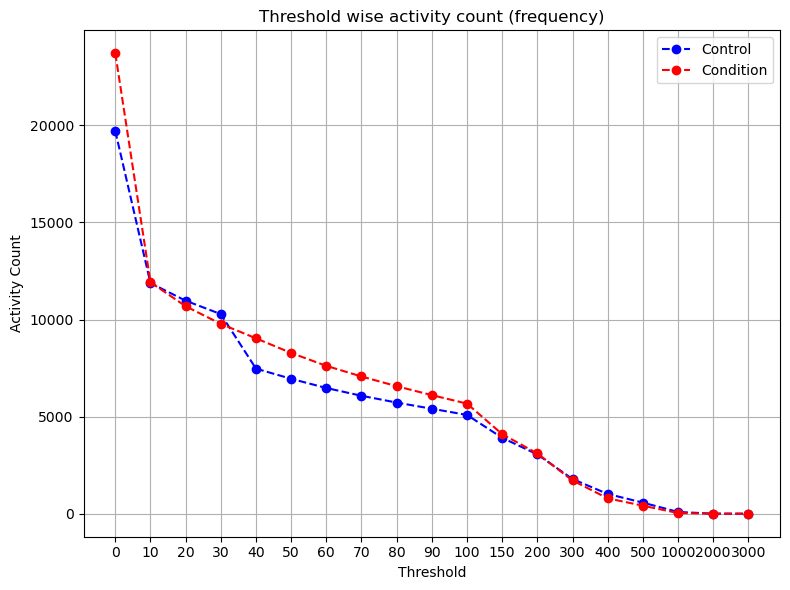

In [39]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Define thresholds
thresholds = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 150, 200, 300, 400, 500, 1000, 2000, 3000]

# Calculate counts for each threshold in control group
control_counts = [control_df[control_df['activity'] >= threshold]['activity'].count() for threshold in thresholds]

# Calculate counts for each threshold in condition group
condition_counts = [condition_df[condition_df['activity'] >= threshold]['activity'].count() for threshold in thresholds]

# Create x-axis labels for thresholds
threshold_labels = [f"{threshold}" for threshold in thresholds]

# Plotting the line plot
plt.figure(figsize=(8, 6))

# Plotting neon-like effect for Control line
control_line, = plt.plot(threshold_labels, control_counts, label='Control', marker='o', color='blue')
control_line.set_linestyle('dashed')  # Dashed line for the neon-like effect

# Plotting neon-like effect for Condition line
condition_line, = plt.plot(threshold_labels, condition_counts, label='Condition', marker='o', color='red')
condition_line.set_linestyle('dashed')  # Dashed line for the neon-like effect

# Adding glow effect to the lines
# control_line.set_path_effects([Line2D.effect_configs['shadow']])  # Neon-like glow effect for Control line
# condition_line.set_path_effects([Line2D.effect_configs['shadow']])  # Neon-like glow effect for Condition line

plt.xlabel('Threshold')
plt.ylabel('Activity Count')
plt.title('Threshold wise activity count (frequency)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


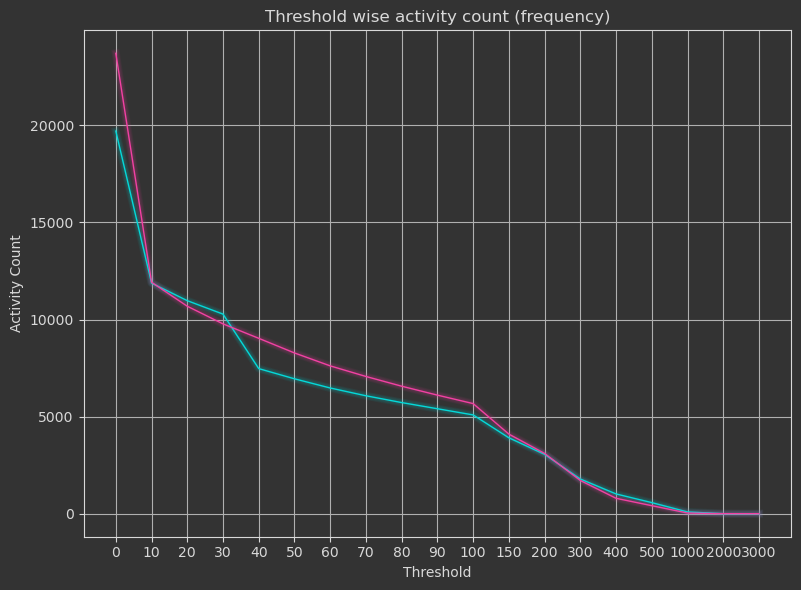

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D


def neon_plot(x, y, ax=None):
    if ax is None:
        ax = plt.gca()
    line, = ax.plot(x, y, lw=1, zorder=6)
    for cont in range(6, 1, -1):
        ax.plot(x, y, lw=cont, color=line.get_color(), zorder=5, alpha=0.05)
    return ax


# Define thresholds
thresholds = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 150, 200, 300, 400, 500, 1000, 2000, 3000]

# Calculate counts for each threshold in control group
control_counts = [control_df[control_df['activity'] >= threshold]['activity'].count() for threshold in thresholds]

# Calculate counts for each threshold in condition group
condition_counts = [condition_df[condition_df['activity'] >= threshold]['activity'].count() for threshold in thresholds]

# Create x-axis labels for thresholds
threshold_labels = [f"{threshold}" for threshold in thresholds]

# Styling
repo = "https://raw.githubusercontent.com/nicoguaro/matplotlib_styles/master"
style = repo + "/styles/neon.mplstyle"
plt.style.use(style)

# Plotting the line plot
plt.figure(figsize=(8, 6))

# Plotting neon-like effect for Control line
# control_line, = plt.plot(threshold_labels, control_counts, label='Control', marker='o', color='blue')
# control_line.set_linestyle('dashed')  # Dashed line for the neon-like effect
# control_line.set_path_effects([Line2D.effect_configs['shadow']])  # Neon-like glow effect for Control line

# Plotting neon-like effect for Condition line
# condition_line, = plt.plot(threshold_labels, condition_counts, label='Condition', marker='o', color='red')
# condition_line.set_linestyle('dashed')  # Dashed line for the neon-like effect
# condition_line.set_path_effects([Line2D.effect_configs['shadow']])  # Neon-like glow effect for Condition line

plt.xlabel('Threshold')
plt.ylabel('Activity Count')
plt.title('Threshold wise activity count (frequency)')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Apply neon-glowing effect to the lines
neon_plot(threshold_labels, control_counts)
neon_plot(threshold_labels, condition_counts)

plt.show()


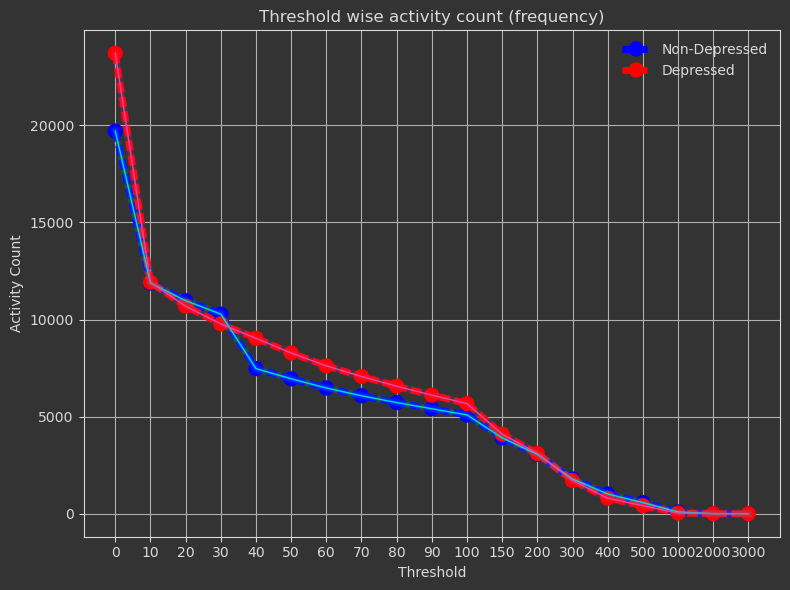

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe

# Function for neon-like glowing effect
def neon_plot(x, y, ax=None):
    if ax is None:
        ax = plt.gca()
    line, = ax.plot(x, y, lw=1, zorder=6)
    for cont in range(6, 1, -1):
        ax.plot(x, y, lw=cont, color=line.get_color(), zorder=5, alpha=0.05)
    return ax

# Define thresholds
thresholds = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 150, 200, 300, 400, 500, 1000, 2000, 3000]

# Calculate counts for each threshold in control group
control_counts = [control_df[control_df['activity'] >= threshold]['activity'].count() for threshold in thresholds]

# Calculate counts for each threshold in condition group
condition_counts = [condition_df[condition_df['activity'] >= threshold]['activity'].count() for threshold in thresholds]

# Create x-axis labels for thresholds
threshold_labels = [f"{threshold}" for threshold in thresholds]

# Styling
repo = "https://raw.githubusercontent.com/nicoguaro/matplotlib_styles/master"
style = repo + "/styles/neon.mplstyle"
plt.style.use(style)

# Plotting the line plot
plt.figure(figsize=(8, 6))

# Plotting neon-like effect for Control line
control_line, = plt.plot(threshold_labels, control_counts, label='Non-Depressed', marker='o', color='blue')
control_line.set_linestyle('dashed')  # Dashed line for the neon-like effect
control_line.set_path_effects([pe.Stroke(linewidth=5, foreground='blue'), pe.Normal()])  # Neon-like glow effect for Control line

# Plotting neon-like effect for Condition line
condition_line, = plt.plot(threshold_labels, condition_counts, label='Depressed', marker='o', color='red')
condition_line.set_linestyle('dashed')  # Dashed line for the neon-like effect
condition_line.set_path_effects([pe.Stroke(linewidth=5, foreground='red'), pe.Normal()])  # Neon-like glow effect for Condition line

plt.xlabel('Threshold')
plt.ylabel('Activity Count')
plt.title('Threshold wise activity count (frequency)')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Apply neon-glowing effect to the lines
neon_plot(threshold_labels, control_counts)
neon_plot(threshold_labels, condition_counts)

plt.show()


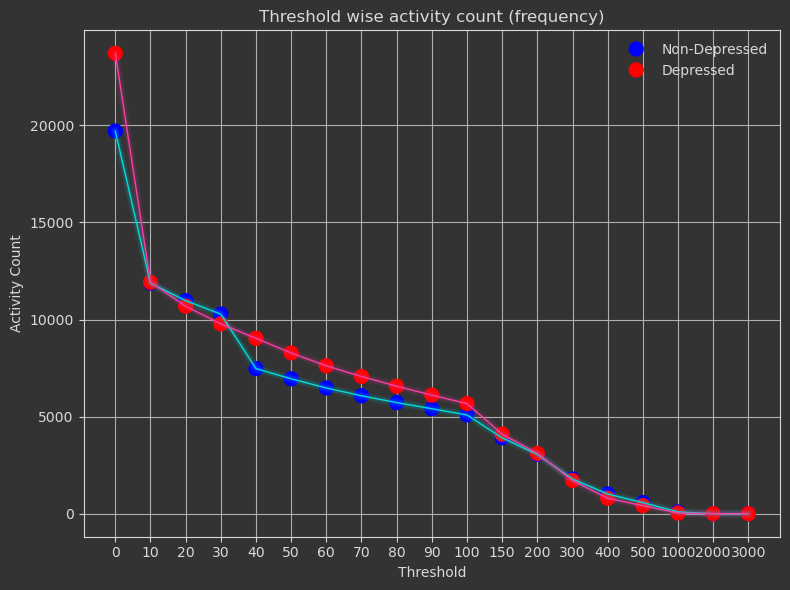

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe

# Function for neon-like glowing effect
def neon_plot(x, y, ax=None):
    if ax is None:
        ax = plt.gca()
    line, = ax.plot(x, y, lw=1, zorder=6)
    for cont in range(6, 1, -1):
        ax.plot(x, y, lw=cont, color=line.get_color(), zorder=5, alpha=0.05)
    return ax

# Define thresholds
thresholds = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 150, 200, 300, 400, 500, 1000, 2000, 3000]

# Calculate counts for each threshold in control group
control_counts = [control_df[control_df['activity'] >= threshold]['activity'].count() for threshold in thresholds]

# Calculate counts for each threshold in condition group
condition_counts = [condition_df[condition_df['activity'] >= threshold]['activity'].count() for threshold in thresholds]

# Create x-axis labels for thresholds
threshold_labels = [f"{threshold}" for threshold in thresholds]

# Styling
repo = "https://raw.githubusercontent.com/nicoguaro/matplotlib_styles/master"
style = repo + "/styles/neon.mplstyle"
plt.style.use(style)

# Plotting the line plot
plt.figure(figsize=(8, 6))

# Plotting neon-like effect for Control line
control_line, = plt.plot(threshold_labels, control_counts, label='Non-Depressed', marker='o', color='blue')
control_line.set_linestyle('none')  # Dashed line for the neon-like effect
control_line.set_path_effects([pe.Stroke(linewidth=5, foreground='blue'), pe.Normal()])  # Neon-like glow effect for Control line

# Plotting neon-like effect for Condition line
condition_line, = plt.plot(threshold_labels, condition_counts, label='Depressed', marker='o', color='red')
condition_line.set_linestyle('none')  # Dashed line for the neon-like effect
condition_line.set_path_effects([pe.Stroke(linewidth=5, foreground='red'), pe.Normal()])  # Neon-like glow effect for Condition line

plt.xlabel('Threshold')
plt.ylabel('Activity Count')
plt.title('Threshold wise activity count (frequency)')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Apply neon-glowing effect to the lines
neon_plot(threshold_labels, control_counts)
neon_plot(threshold_labels, condition_counts)

plt.show()
